# Home Credit Default Risk Prediction



# I. Introduction


The main objective of this project is to predict how capable each applicant is of repaying a loan.I worked on classification of data using different approaches such as Pocket, LDA, QDA, Logistic Regression. I implemented above mentioned classification algorithms for risk prediction in Python with out libraries. I used pandas, numpy to read and process data, matlplotlib,seaborn and other required packages for visualizing the data, scipy,scikit-learn to prepare data for modeling. I computed confusion matrix and analyzed the results to calculate accuracy, precision, recall, F1 as part of evaluation metrics.

# II. Data

### Introduction of Data: 
The dataset I have choosen for Classification is Home Credit Default Risk from Kaggle. Home Credit makes use of a variety of alternative data including telco and transactional information to predict their clients' repayment abilities. We can observe the pattern of data by plotting visualizations between features of this data. I used pandas to read and process data, matlplotlib and other required packages for visualizing the data. 

### Attributes: 
Attributes in the dataset are as below:

SK_ID_CURR:	ID of loan in our sample    
TARGET:	Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)    
NAME_CONTRACT_TYPE:	Identification if loan is cash or revolving    
CODE_GENDER: Gender of the client    
FLAG_OWN_CAR: Flag if the client owns a car    
FLAG_OWN_REALTY: Flag if client owns a house or flat    
CNT_CHILDREN: Number of children the client has    
AMT_INCOME_TOTAL: Income of the client    
AMT_CREDIT: Credit amount of the loan    
AMT_ANNUITY: Loan annuity    
AMT_GOODS_PRICE: For consumer loans it is the price of the goods for which the loan is given    
NAME_TYPE_SUITE: Who was accompanying client when he was applying for the loan    
NAME_INCOME_TYPE: Clients income type (businessman, working, maternity leave,…)    
NAME_EDUCATION_TYPE: Level of highest education the client achieved    
NAME_FAMILY_STATUS:	Family status of the client    
NAME_HOUSING_TYPE: What is the housing situation of the client (renting, living with parents, ...)    
REGION_POPULATION_RELATIVE:	Normalized population of region where client lives (higher number means the client lives in more populated region)    
DAYS_BIRTH:	Client's age in days at the time of application    
DAYS_EMPLOYED: How many days before the application the person started current employment    
DAYS_REGISTRATION: How many days before the application did client change his registration    
DAYS_ID_PUBLISH: How many days before the application did client change the identity document with which he applied for the loan  
OWN_CAR_AGE: Age of client's car    
FLAG_MOBIL: Did client provide mobile phone (1=YES, 0=NO)    
FLAG_EMP_PHONE:	Did client provide work phone (1=YES, 0=NO)    
FLAG_WORK_PHONE: Did client provide home phone (1=YES, 0=NO)    
FLAG_CONT_MOBILE: Was mobile phone reachable (1=YES, 0=NO)    
FLAG_PHONE: Did client provide home phone (1=YES, 0=NO)    
FLAG_EMAIL: Did client provide email (1=YES, 0=NO)    
OCCUPATION_TYPE: What kind of occupation does the client have    
CNT_FAM_MEMBERS: How many family members does client have    
REGION_RATING_CLIENT: Our rating of the region where client lives (1,2,3)    
REGION_RATING_CLIENT_W_CITY:Our rating of the region where client lives with taking city into account (1,2,3)    


### Data Source: 
https://www.kaggle.com/c/home-credit-default-risk/data

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import show

### Reading CSV file

In [2]:
cols= ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']
loan_df = pd.read_csv("application_train.csv",usecols=cols)
print("Dimensions of dataset\nrows: {0}\ncolumns: {1}".format(loan_df.shape[0],loan_df.shape[1]))
print('First 5 records')
loan_df.head()

Dimensions of dataset
rows: 307511
columns: 32
First 5 records


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...               FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0             ...                        1              1               0   
1             ...                        1              1               0   
2             ...                        1              1               1   
3             ...                        1              1               0   
4             ...                        1              1               0   

  FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                1          1          0         Laborers              1.0   
1                1          1          0       Core staff              2.0   
2                1          1          0         Laborers              1.0   
3                1          0          0         Laborers              2.0   
4                1          0          0       Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  
0                     2                            2  
1                     1                            1  
2                     2                            2  
3                     2                            2  
4                     2                            2  

[5 rows x 32 columns]

### Preprocessing data

In [3]:
print('Missing Values')
loan_df.isnull().sum()

Missing Values


SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

### Replacing Missing values

#### OWN_CAR_AGE

In [4]:
loan_df_proces=loan_df
loan_df.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [5]:
dfn = loan_df_proces.loc[loan_df_proces['FLAG_OWN_CAR'] == 'N']
print('Missing values in OWN_CAR_AGE when FLAG_OWN_CAR=N are {0}'.format(dfn['OWN_CAR_AGE'].isnull().sum()))

Missing values in OWN_CAR_AGE when FLAG_OWN_CAR=N are 202924


#### Clients who don't have a car have most missing values in OWN_CAR_AGE attribute, so we can replace them with 0.

In [6]:
loan_df_proces['OWN_CAR_AGE'].fillna(0, inplace = True)
print('Missing values in attribute OWN_CAR_AGE are replaced by 0.\nCurrent missing values'+
      ' count:{0}'.format(loan_df_proces['OWN_CAR_AGE'].isnull().sum()))

Missing values in attribute OWN_CAR_AGE are replaced by 0.
Current missing values count:0


#### OCCUPATION_TYPE

In [7]:
#loan_df.OCCUPATION_TYPE.unique()
loan_df_proces['OCCUPATION_TYPE'].fillna('Unknown', inplace = True)
print('Missing values in attribute OCCUPATION_TYPE are replaced by Unknown.\nCurrent missing values'+
      ' count:{0}'.format(loan_df_proces['OCCUPATION_TYPE'].isnull().sum()))

Missing values in attribute OCCUPATION_TYPE are replaced by Unknown.
Current missing values count:0


#### NAME_TYPE_SUITE

In [8]:
loan_df_proces['NAME_TYPE_SUITE'].fillna('Unknown', inplace = True)
print('Missing values in attribute NAME_TYPE_SUITE are replaced by Unknown.\nCurrent missing values'+
      ' count:{0}'.format(loan_df_proces['NAME_TYPE_SUITE'].isnull().sum()))

Missing values in attribute NAME_TYPE_SUITE are replaced by Unknown.
Current missing values count:0


#### AMT_GOODS_PRICE

In [9]:
loan_df_proces.AMT_GOODS_PRICE.fillna(loan_df_proces.AMT_GOODS_PRICE.mean(), inplace=True)
print('Missing values in attribute AMT_GOODS_PRICE are replaced by mean value.\nCurrent missing values'+
      ' count:{0}'.format(loan_df_proces['AMT_GOODS_PRICE'].isnull().sum()))

Missing values in attribute AMT_GOODS_PRICE are replaced by mean value.
Current missing values count:0


#### AMT_ANNUITY

In [10]:
loan_df_proces.AMT_ANNUITY.fillna(loan_df_proces.AMT_ANNUITY.mean(), inplace=True)
print('Missing values in attribute AMT_ANNUITY are replaced by mean value.\nCurrent missing values'+
      ' count:{0}'.format(loan_df_proces['AMT_ANNUITY'].isnull().sum()))

Missing values in attribute AMT_ANNUITY are replaced by mean value.
Current missing values count:0


#### CNT_FAM_MEMBERS

In [11]:
loan_df_proces.CNT_FAM_MEMBERS.fillna(0, inplace=True)
print('Missing values in attribute CNT_FAM_MEMBERS are replaced by 0.\nCurrent missing values'+
      ' count:{0}'.format(loan_df_proces['CNT_FAM_MEMBERS'].isnull().sum()))

Missing values in attribute CNT_FAM_MEMBERS are replaced by 0.
Current missing values count:0


### Plots for understanding or analysis

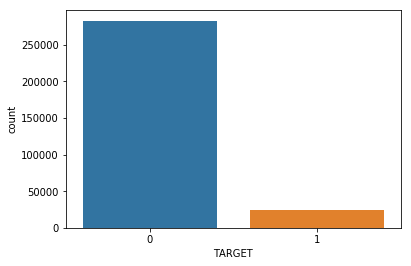

In [12]:
sns.countplot(x="TARGET", data=loan_df_proces);

There are very less number of defaulters in the dataset.

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


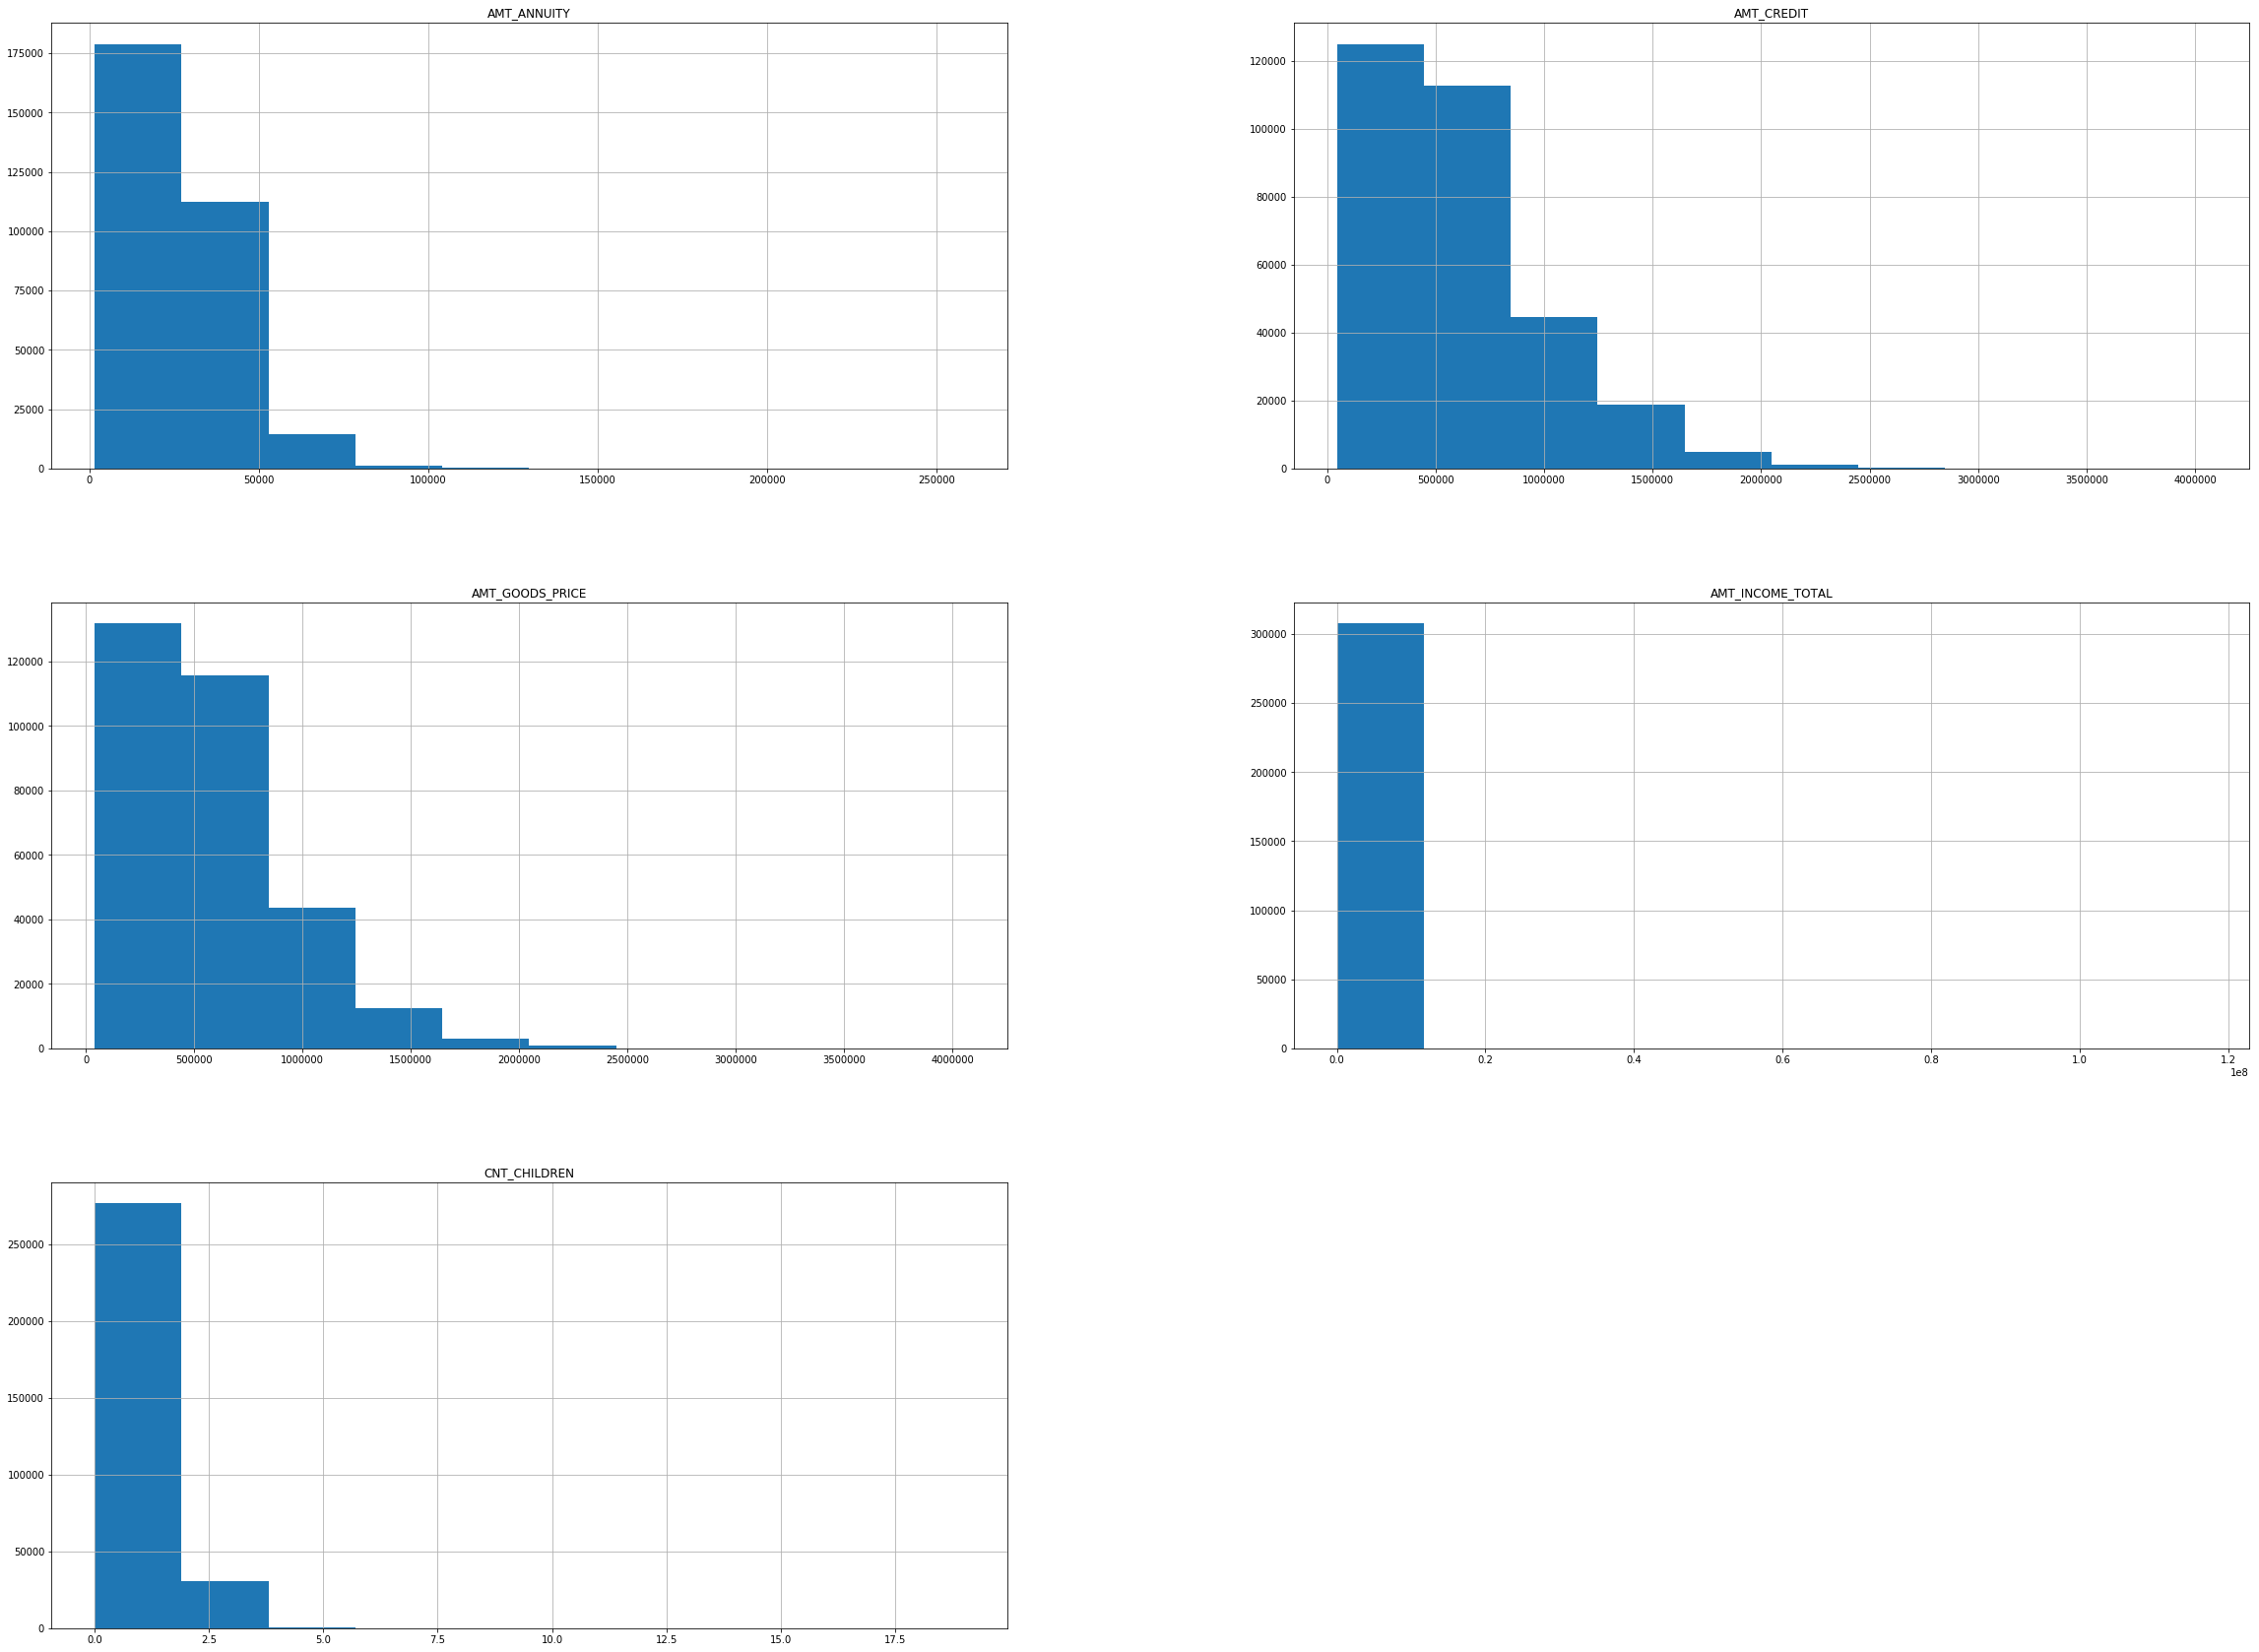

In [13]:
fig = plt.figure(figsize = (40,30))
ax = fig.gca()
loan_df_proces[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_CHILDREN']].hist(ax = ax);

AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_CHILDREN are left skewed.¶

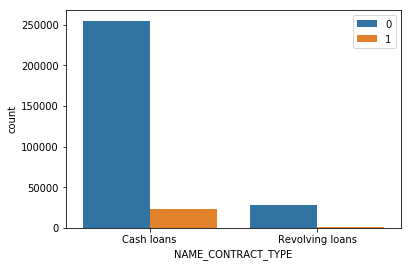

In [14]:
sns.countplot(x='NAME_CONTRACT_TYPE',hue='TARGET',data=loan_df_proces);
plt.legend(loc="upper right");

There are less defaulters compared to non-defaulters in both Cash and Revolving loans

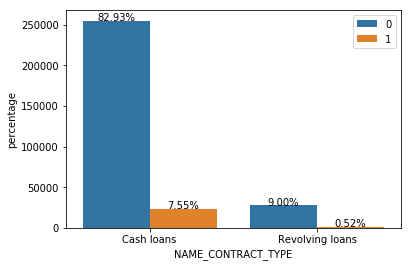

In [15]:
total = float(len(loan_df_proces))
ax=sns.countplot(x='NAME_CONTRACT_TYPE',hue='TARGET',data=loan_df_proces)
ax.set_ylabel('percentage')
plt.legend(loc="upper right")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 
show()

Defaulters are less in number in both types of loans

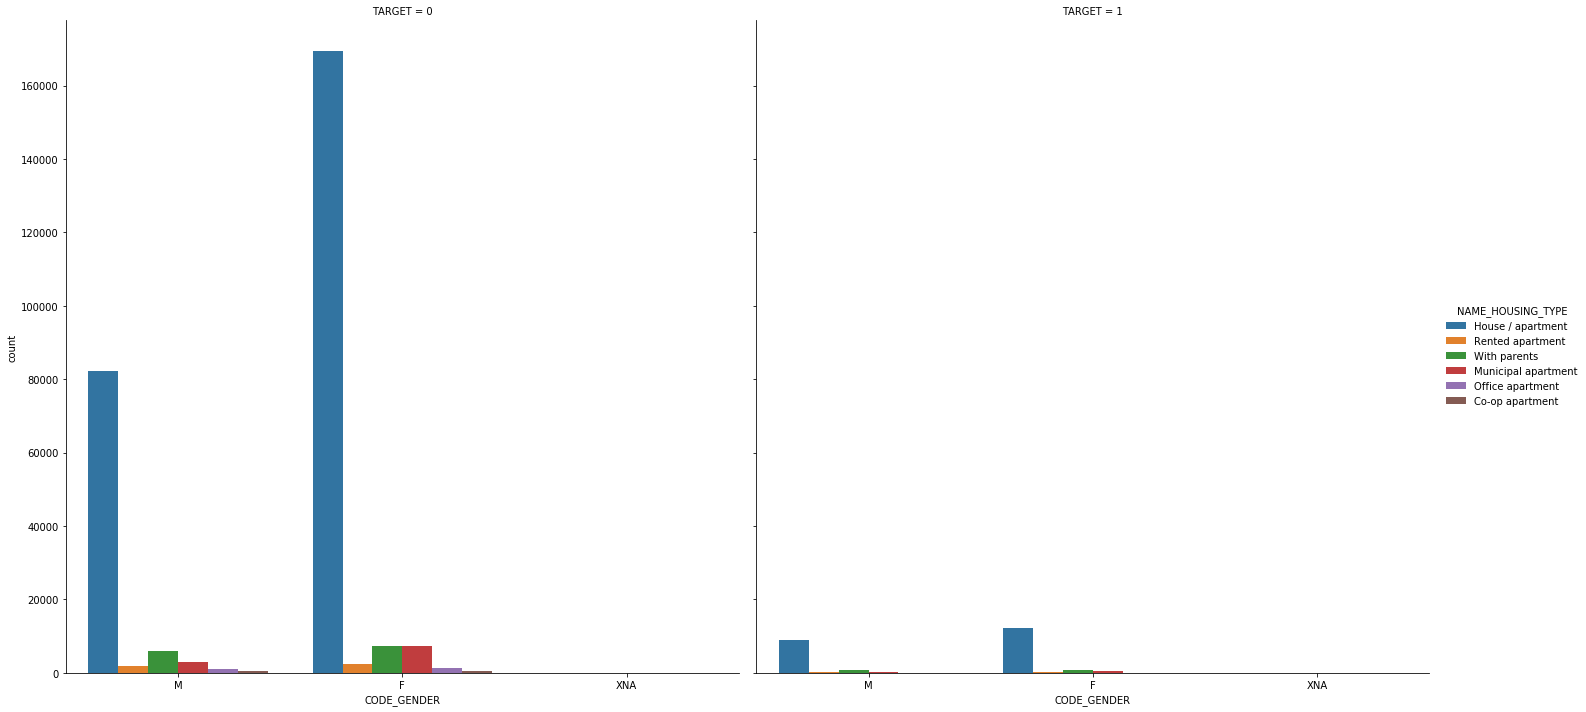

In [16]:
sns.catplot(x="CODE_GENDER", hue="NAME_HOUSING_TYPE", col="TARGET",
               data=loan_df_proces, kind="count",
               height=10, aspect=1);

There are more males and females among defaulters and non-defaulters who owns house

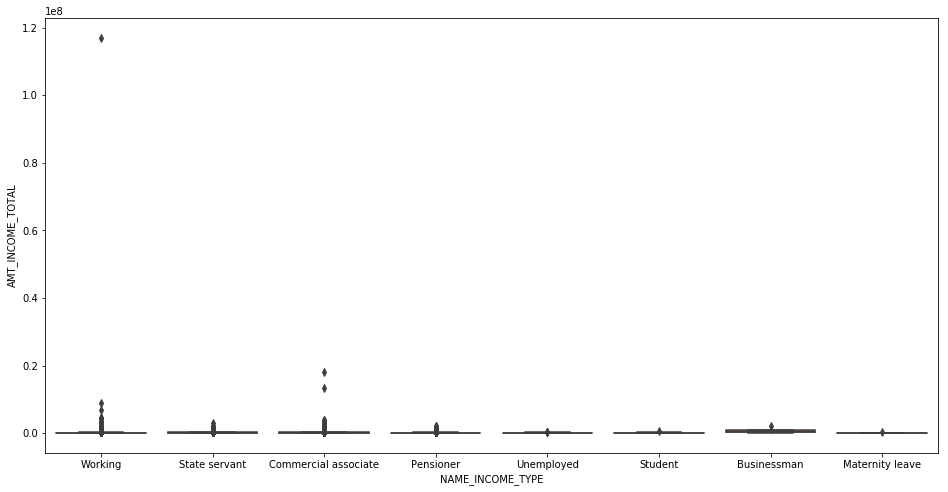

In [17]:
dims=(16,8)
fig, ax = plt.subplots(figsize=dims)
sns.boxplot(x="NAME_INCOME_TYPE", y="AMT_INCOME_TOTAL", data=loan_df_proces, palette="Set1");

Categorical distribution of Income based on income type. There are outliers in the data.

Removing outliers from income
(307494, 32)
(307511, 32)


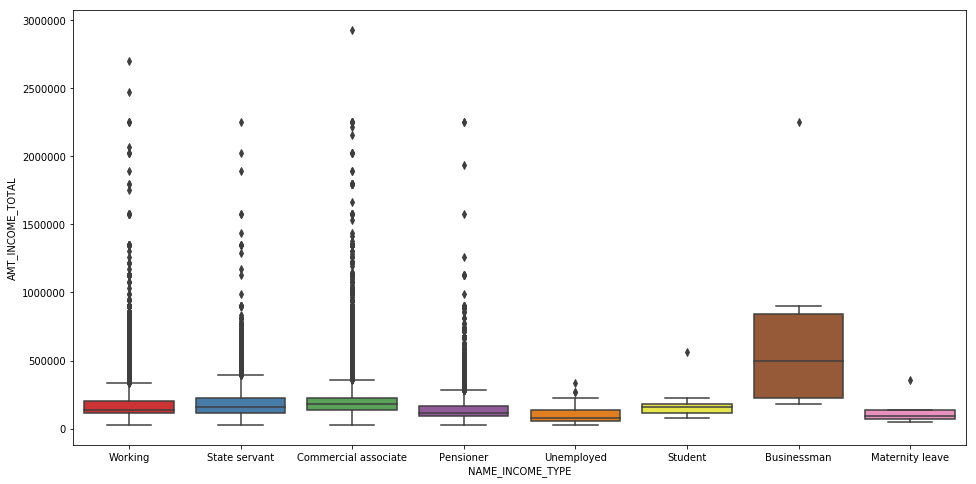

In [18]:
loan_df_proces=loan_df_proces[loan_df_proces.AMT_INCOME_TOTAL<3000000]
print('Removing outliers from income')
print(loan_df_proces.shape)
print(loan_df.shape)
dims=(16,8)
fig, ax = plt.subplots(figsize=dims)
sns.boxplot(x="NAME_INCOME_TYPE", y="AMT_INCOME_TOTAL", data=loan_df_proces, palette="Set1")

Distribution of income based on income type after removing outliers


##### Created flag variables for categorical attributes

In [19]:
loan_df_flag= pd.get_dummies(data=loan_df, columns=['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE','OCCUPATION_TYPE'])
loan_df_flag.shape
loan_df_flag.head()

SK_ID_CURR  TARGET FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      100002       1            N               Y             0   
1      100003       0            N               N             0   
2      100004       0            Y               Y             0   
3      100006       0            N               Y             0   
4      100007       0            N               Y             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
0          202500.0    406597.5      24700.5         351000.0   Unaccompanied   
1          270000.0   1293502.5      35698.5        1129500.0          Family   
2           67500.0    135000.0       6750.0         135000.0   Unaccompanied   
3          135000.0    312682.5      29686.5         297000.0   Unaccompanied   
4          121500.0    513000.0      21865.5         513000.0   Unaccompanied   

                   ...                   OCCUPATION_TYPE_Low-skill Laborers  \
0                  ...                                                    0   
1                  ...                                                    0   
2                  ...                                                    0   
3                  ...                                                    0   
4                  ...                                                    0   

   OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Medicine staff  \
0                         0                               0   
1                         0                               0   
2                         0                               0   
3                         0                               0   
4                         0                               0   

   OCCUPATION_TYPE_Private service staff  OCCUPATION_TYPE_Realty agents  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   

   OCCUPATION_TYPE_Sales staff  OCCUPATION_TYPE_Secretaries  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   OCCUPATION_TYPE_Security staff  OCCUPATION_TYPE_Unknown  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   

   OCCUPATION_TYPE_Waiters/barmen staff  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     0  

[5 rows x 74 columns]

#### Correlation Matrix

In [20]:
corr_loan = loan_df_flag.corr()
corr_loan

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                                 1.000000 -0.002108     -0.001129   
TARGET                                    -0.002108  1.000000      0.019187   
CNT_CHILDREN                              -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL                          -0.001820 -0.003982      0.012882   
AMT_CREDIT                                -0.000343 -0.030369      0.002145   
AMT_ANNUITY                               -0.000433 -0.012817      0.021374   
AMT_GOODS_PRICE                           -0.000232 -0.039628     -0.001826   
REGION_POPULATION_RELATIVE                 0.000849 -0.037227     -0.025573   
DAYS_BIRTH                                -0.001500  0.078239      0.330938   
DAYS_EMPLOYED                              0.001366 -0.044932     -0.239818   
DAYS_REGISTRATION                         -0.000973  0.041975      0.183395   
DAYS_ID_PUBLISH                           -0.000384  0.051457     -0.028019   
OWN_CAR_AGE                                0.001586  0.002285      0.068843   
FLAG_MOBIL                                 0.002804  0.000534      0.001041   
FLAG_EMP_PHONE                            -0.001337  0.045982      0.240714   
FLAG_WORK_PHONE                           -0.000415  0.028524      0.055630   
FLAG_CONT_MOBILE                           0.002815  0.000370     -0.000794   
FLAG_PHONE                                 0.002753 -0.023806     -0.029906   
FLAG_EMAIL                                 0.000281 -0.001758      0.022619   
CNT_FAM_MEMBERS                           -0.002888  0.009312      0.879153   
REGION_RATING_CLIENT                      -0.001075  0.058899      0.025423   
REGION_RATING_CLIENT_W_CITY               -0.001138  0.060893      0.024781   
NAME_CONTRACT_TYPE_Cash loans             -0.001654  0.030896     -0.029998   
NAME_CONTRACT_TYPE_Revolving loans         0.001654 -0.030896      0.029998   
CODE_GENDER_F                              0.000749 -0.054704     -0.047394   
CODE_GENDER_M                             -0.000728  0.054713      0.047382   
CODE_GENDER_XNA                           -0.002721 -0.001069      0.001663   
NAME_INCOME_TYPE_Businessman              -0.000154 -0.001690     -0.002504   
NAME_INCOME_TYPE_Commercial associate      0.000685 -0.011906      0.028649   
NAME_INCOME_TYPE_Maternity leave           0.001771  0.004726      0.005489   
...                                             ...       ...           ...   
NAME_FAMILY_STATUS_Married                -0.003959 -0.025043      0.172702   
NAME_FAMILY_STATUS_Separated               0.001956  0.001168     -0.021851   
NAME_FAMILY_STATUS_Single / not married    0.003415  0.026518     -0.141051   
NAME_FAMILY_STATUS_Unknown                -0.001124 -0.000756     -0.001473   
NAME_FAMILY_STATUS_Widow                   0.000580 -0.019394     -0.103722   
NAME_HOUSING_TYPE_Co-op apartment          0.000345 -0.000312      0.009789   
NAME_HOUSING_TYPE_House / apartment       -0.001874 -0.028555     -0.020725   
NAME_HOUSING_TYPE_Municipal apartment     -0.000549  0.003329     -0.002571   
NAME_HOUSING_TYPE_Office apartment         0.000272 -0.005103      0.013461   
NAME_HOUSING_TYPE_Rented apartment         0.003522  0.019767      0.012444   
NAME_HOUSING_TYPE_With parents             0.000976  0.029966      0.017040   
OCCUPATION_TYPE_Accountants               -0.001737 -0.021610      0.017973   
OCCUPATION_TYPE_Cleaning staff             0.002062  0.006979     -0.009206   
OCCUPATION_TYPE_Cooking staff             -0.001272  0.012222      0.012990   
OCCUPATION_TYPE_Core staff                -0.000608 -0.020378      0.061285   
OCCUPATION_TYPE_Drivers                    0.000467  0.030303      0.033313   
OCCUPATION_TYPE_HR staff                  -0.000142 -0.002639      0.001391   
OCCUPATION_TYPE_High skill tech staff      0.001874 -0.013766      0.015457   
OCCUPATION_TYPE_IT staff                   0.000920 -0.002445     -0.001130   
OCCUPATION_T

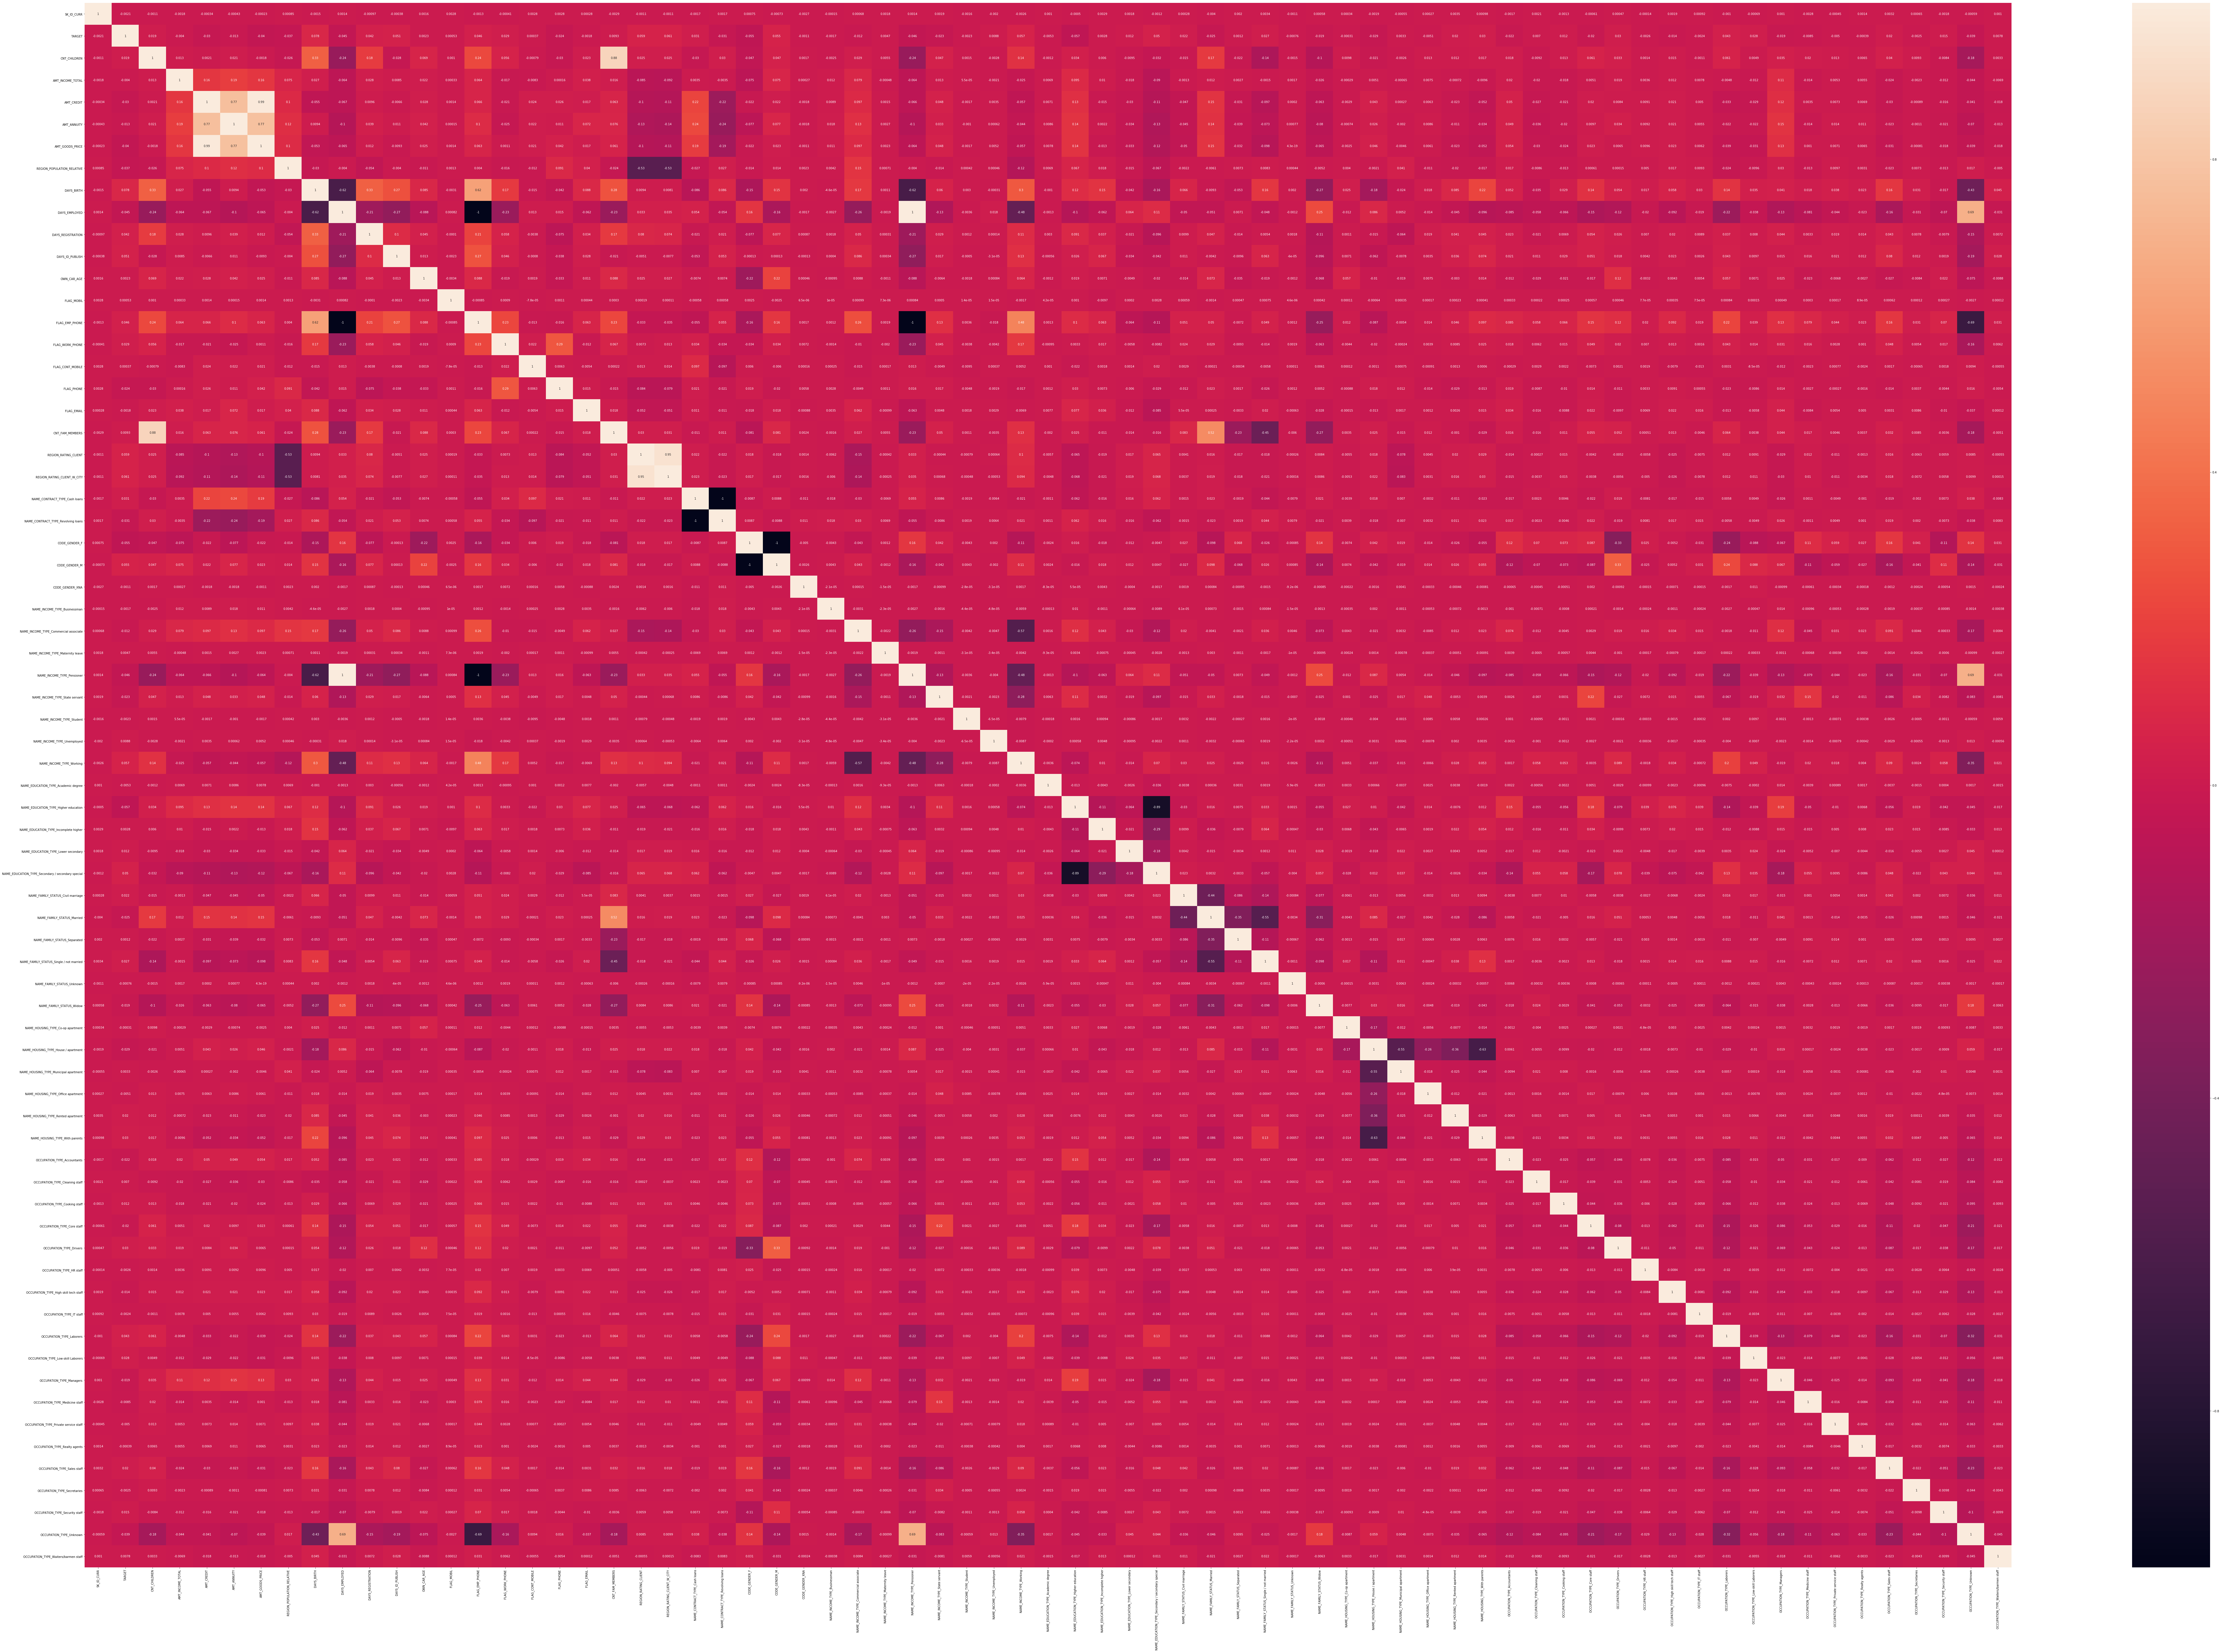

In [21]:
f, ax = plt.subplots(figsize=(150, 100))
sns.heatmap(corr_loan,annot=True);

Note: Double click to zoom above heat map

### Preliminary observation

1. The number of 1's in TARGET are very less compared to 0's. This is unbalanced dataset, the distribution of target variable is dominated by one value which leads to incorrect classification of results. We need to resample 1's or reduce records with 0's in TARGET variable.  

2. In correlation matrix, we observe there are negative values for some fields such as income, few flags of occupation. This explains more income expains the ability of client to pay back loan(as we get 0- non defaulter).

3. From distribution plots,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_CHILDREN are left skewed which may affect the classification.    

4. There are outliers in attributes such as AMT_INCOME_TOTAL that needs further processing as these affect our model.

5. NAME_HOUSING_TYPE feature has more records for House category than others, this may produce incorrect classification results for other category values in this attribute.

6. AMT_INCOME_TOTAL is distributed mostly for NAME_INCOME_TYPE = Business. Again this may not produce accurate results for other values.

# III. Method

Summarize the pocket algorithm, discriminant analysis, and logistic regression.
The superclass *Classifier* defines common utility methods. 
Finish the normalize function for you. 
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the 4 classification models 
 - your implementation and description

### Summary of Classification models  

#### Pocket Algorithm:  
Pocket algorithm is an extension to perceptron algorithm where the best weights are stored in a pocket. Perceptron algorithm finds output using a step function on linear output but there is no guarantee on convergence. We need to have maximum iterations to find the best solution. Similar to this, pocket algorithm compares the weight with the best weight it has till now and updates weight that is stored in pocket if latest weight produces best results. At the end, weight that is in pocket will be the best solution produced by this algorithm.

#### LDA:

LDA classify data by finding linear combination of features. We assume for every class k , data has a guassian distribution. Covariance matrix is similar for all class labels.  
Discriminant function is given by
$$
\delta_k(\xv) = \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
\boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
$$


#### QDA:

QDA classifies data similar to LDA but it uses separate covariance matrix for each class.

Discriminant function is given by   
$$
\delta_k(x)= -\frac{1}{2}\text{log}|\Sigma_k|-\frac{1}{2}(x-\mu_{k})^{T}\Sigma_{k}^{-1}(x-\mu_{k})+\text{log}\pi_k 
$$

Classification rule to classify a new record is given by

$$
\hat{G}(x)=\text{arg }\underset{k}{\text{max }}\delta_k(x)
$$

#### Logistic Regression:
Logistic regression explains relationship between dependent variables and independent variable. It predicts the probability of input data into a class. This model is best suitable for binary classification of data.
Weight updation is given by


$$
wv \leftarrow wv + \alpha Xm^\top \Big(  Tm - g(Xm)\Big).
$$




### Explanation of codes   

#### A. Super Classs Definition:   
This contains BaseModel class with train and use abstract methods to implement in child classes that inherit BaseModel class.   
We have an abstract class Classifier with methods add_ones to add ones column to input matrix X, normalize method to normalize the input data, _check_matrix method to check for validity of matrix. It has abstract methods train and use that can be implemented in child classes for training data and predicting results for new data.   


#### B. Pocket Algorithm:   
I implemented Pocket Algorithm in Pocket class that inherits Classifier class. Pocket class contains 3 methods as train, compare and use. Train method is used to calculate weight matrix for input training data. Weight matrix is updated for each record and this updated weight is compared with the best weight stored in pocket using compare method. If new weight produces best results then that is stored in pocket. This process is repeated for given iterations or until it converges.

#### C. QDA Algorithm:
QDA class inherits from Classifier class. QDA contains train method to calculate mean, covariance of each class, prior probabilities of each class k to use in prediction.Use method is for classifying data by computing discriminant values d.These are used to classify the labels at end by comparision.

#### D. LDA Algorithm:
LDA class inherits from Classifier class. LDA contains train method to calculate mean, single covariance for all input data, prior probabilities of each class k to use in prediction.Use method is for classifying data by computing discriminant values d.These are used to classify the labels at end by comparision.

#### E. Logistic Regression:
Logistic class inherits from Classifier class. This contains train method to compute weight matrix using ga method,soft max method. Use function is for finding probabilities for test data using already computed weight matrix.


### A. Super Classs Definition

In [22]:
import numpy as np
import abc
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm

In [24]:
from copy import deepcopy as copy 

class Pocket(Classifier):
    def __init__(self,alpha,maxiter):
        Classifier.__init__(self)      
        self.alpha = alpha
        self.maxiter = maxiter
    
    
    # return 1 if w is better -1 if wp is better
    def compare(self,X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self, X, T):
        N = X.shape[0]
        self.w = np.zeros(X.shape[1])
        self.w_pocket = copy(self.w)
        #self.alpha = alpha
        #self.maxiter = maxiter
        for i in range(self.maxiter):   
            converged = True
            for k in np.random.permutation(N): #range(N):
                y = self.w @ X[k]
                #print(y,'\t',T[k])
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X[k]
                    converged = False
                    ##### additional for pocket algorithm 
                    if self.compare(X, T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]
    
            if converged:
                print("converged at ", i)
                break

        print("End of training: ", i)

        
    def use(self, X):
        y= X@self.w_pocket
        return np.where(y>=0.0,1,-1)
        #return y
        

### C. QDA

In [25]:
class QDA(Classifier):
    def __init__(self):
        Classifier.__init__(self)
        self.mu = []
        self.sigma = []
        self.prior = []
        self.d = []
        
        
    def train(self, X, T):
        #calculate mu,sigma, prior for each label
        self.labels = np.unique(T)
        self.labelsCount = np.unique(T).shape[0]
        
        for i in range(self.labelsCount):
            index = T==self.labels[i]
            self.mu.append(np.mean(X[index], 0))
            self.sigma.append(np.cov(X[index].T))
            self.prior.append(T[T==self.labels[i]].size / T.shape[0])
             
    def use(self, X):
        for i in range(self.labelsCount):
            sigma_det = np.log(np.linalg.det(self.sigma[i]))
            sigma_inv = np.linalg.inv(self.sigma[i])
            diffv = X - self.mu[i].T
            self.d.append(-0.5*sigma_det-0.5*np.sum(np.dot(diffv,sigma_inv)*diffv,axis=1) + np.log(self.prior[i]))
        return self.d
        
#     def QDA(self,X, mu, sigma, prior):
#         sigma_inv = np.linalg.inv(sigma)
#         diffv = X - mu
#         return -0.5  * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) + np.log(prior)
    

### D. LDA

In [26]:
class LDA(Classifier):
    def __init__(self):
        Classifier.__init__(self)
        self.mu = []
        self.sigma = []
        self.prior = []
        self.d = []
        
        
    def train(self, X, T):
        self.labels = np.unique(T)
        self.labelsCount = np.unique(T).shape[0]
        self.sigma = np.cov(X.T)
        for i in range(self.labelsCount):
            index = T==self.labels[i]
            self.mu.append(np.mean(X[index], 0))
            
            self.prior.append(T[T==self.labels[i]].size / T.shape[0])
             
    def use(self, X):
        for i in range(self.labelsCount):
            sigma_det = np.log(np.linalg.det(self.sigma))
            sigma_inv = np.linalg.inv(self.sigma)
            diffv = X - self.mu[i].T
            self.d.append(-0.5*sigma_det-0.5*np.sum(np.dot(diffv,sigma_inv)*diffv,axis=1) + np.log(self.prior[i]))
        return self.d


### E. Logistic Regression

In [27]:
class Logistic1(Classifier):
    
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
        
    def soft_max(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        fun = np.exp(z)
        fun = np.array(fun)
        return fun/ np.sum(np.sum(fun, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(fun))
        
    def g(self, X, w):
        return self.soft_max(X @ w) 
    
    def train(self, X, T):
        N = X.shape[0]
        X = self.add_ones(X)
        self.w = np.random.rand(np.array(X.shape[1]), len(np.unique(np.array(T))))
        niter = 1000
        T = self.add_ones(T.reshape(-1,1))
        for step in range(niter):
            ys = self.g(X, self.w)
            self.w += self.alpha * (X.T @ (T - ys))
    
    def use(self, X):
        X = self.add_ones(X)
        return self.g(X, self.w)

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

### Pocket Algorithm

In [28]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn import metrics as eval

loan_df_proces = loan_df_proces.drop(['SK_ID_CURR'],axis=1)
loan_df_proces.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

              ...              FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0             ...                       1              1               0   
1             ...                       1              1               0   
2             ...                       1              1               1   
3             ...                       1              1               0   
4             ...                       1              1               0   

  FLAG_CONT_MOBILE FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                1          1           0         Laborers              1.0   
1                1          1           0       Core staff              2.0   
2                1          1           0         Laborers              1.0   
3                1          0           0         Laborers              2.0   
4                1          0           0       Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  
0                     2                            2  
1                     1                            1  
2                     2                            2  
3                     2                            2  
4                     2                            2  

[5 rows x 31 columns]

##### Normalize numerical data

In [29]:
loan_df_proces.loc[:,['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE']] = loan_df_proces.loc[:,['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE']].apply(zscore)
loan_df_proces.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0     -0.577533          0.356496   -0.478055    -0.166074        -0.507431   
1     -0.577533          1.056493    1.725636     0.593421         1.600924   
2     -0.577533         -1.043497   -1.152892    -1.405692        -1.092408   
3     -0.577533         -0.343500   -0.711405     0.178247        -0.653675   
4     -0.577533         -0.483500   -0.213677    -0.361853        -0.068698   

              ...              FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0             ...                       1              1               0   
1             ...                       1              1               0   
2             ...                       1              1               1   
3             ...                       1              1               0   
4             ...                       1              1               0   

  FLAG_CONT_MOBILE FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                1          1           0         Laborers              1.0   
1                1          1           0       Core staff              2.0   
2                1          1           0         Laborers              1.0   
3                1          0           0         Laborers              2.0   
4                1          0           0       Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  
0                     2                            2  
1                     1                            1  
2                     2                            2  
3                     2                            2  
4                     2                            2  

[5 rows x 31 columns]

##### Categorical to flag variables

In [30]:
FLAG_OWN_CAR = {'Y': 1, 'N':0}
FLAG_OWN_REALTY = {'Y': 1, 'N':0}
loan_df_proces['FLAG_OWN_CAR'] = loan_df_proces['FLAG_OWN_CAR'].apply(lambda x: FLAG_OWN_CAR[x])
loan_df_proces['FLAG_OWN_CAR'] = loan_df_proces['FLAG_OWN_CAR'].astype(int)
loan_df_proces['FLAG_OWN_REALTY'] = loan_df_proces['FLAG_OWN_REALTY'].apply(lambda x: FLAG_OWN_REALTY[x])
loan_df_proces['FLAG_OWN_REALTY'] = loan_df_proces['FLAG_OWN_REALTY'].astype(int)
target = {1: 1, 0:-1}
loan_df_proces['TARGET'] = loan_df_proces['TARGET'].apply(lambda x: target[x])
loan_df_proces['TARGET'] = loan_df_proces['TARGET'].astype(int)
cat_cols=['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
dummies = pd.get_dummies(loan_df_proces.loc[:,cat_cols])

In [31]:
loan_df_proces.drop(cat_cols,axis='columns',inplace=True)
df_dummies= pd.concat([loan_df_proces,dummies],axis='columns')
df_dummies.head()

TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0       1             0                1     -0.577533          0.356496   
1      -1             0                0     -0.577533          1.056493   
2      -1             1                1     -0.577533         -1.043497   
3      -1             0                1     -0.577533         -0.343500   
4      -1             0                1     -0.577533         -0.483500   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
0   -0.478055    -0.166074        -0.507431                   -0.149443   
1    1.725636     0.593421         1.600924                   -1.252740   
2   -1.152892    -1.405692        -1.092408                   -0.783441   
3   -0.711405     0.178247        -0.653675                   -0.928981   
4   -0.213677    -0.361853        -0.068698                    0.563580   

   DAYS_BIRTH                  ...                   \
0    1.506877                  ...                    
1   -0.166804                  ...                    
2   -0.689485                  ...                    
3   -0.680090                  ...                    
4   -0.892508                  ...                    

   OCCUPATION_TYPE_Low-skill Laborers  OCCUPATION_TYPE_Managers  \
0                                   0                         0   
1                                   0                         0   
2                                   0                         0   
3                                   0                         0   
4                                   0                         0   

   OCCUPATION_TYPE_Medicine staff  OCCUPATION_TYPE_Private service staff  \
0                               0                                      0   
1                               0                                      0   
2                               0                                      0   
3                               0                                      0   
4                               0                                      0   

   OCCUPATION_TYPE_Realty agents  OCCUPATION_TYPE_Sales staff  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   OCCUPATION_TYPE_Secretaries  OCCUPATION_TYPE_Security staff  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   

   OCCUPATION_TYPE_Unknown  OCCUPATION_TYPE_Waiters/barmen staff  
0                        0                                     0  
1                        0                                     0  
2                        0                                     0  
3                        0                                     0  
4                        0                                     0  

[5 rows x 80 columns]

In [32]:
loan_df_model = df_dummies
loan_df_model_Target1 = loan_df_model.loc[loan_df_model['TARGET']==1]
loan_df_model_Target0 = loan_df_model.loc[loan_df_model['TARGET']==-1]
# considering 1000 records from each target type to handle computation problem
loan_df_model_Target1 = loan_df_model_Target1.iloc[:1000,:]
loan_df_model_Target0 = loan_df_model_Target0.iloc[:1000,:]
loan_df_model = pd.concat([loan_df_model_Target1,loan_df_model_Target0], ignore_index=True)
X = loan_df_model.drop(['TARGET'],axis=1)
Target= loan_df_model['TARGET']
X= X.values
T=Target.values.reshape((-1,1))

In [33]:
print(loan_df_model_Target1.shape)
loan_df_model_Target1.head()

(1000, 80)


TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0        1             0                1     -0.577533          0.356496   
26       1             0                1     -0.577533         -0.576833   
40       1             0                1     -0.577533          0.356496   
42       1             0                0     -0.577533         -0.343500   
81       1             0                1     -0.577533         -0.903498   

    AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
0    -0.478055    -0.166074        -0.507431                   -0.149443   
26    0.946657    -0.001994         0.443157                   -0.205258   
40    1.477358     0.547118         0.857515                    0.310602   
42   -0.770564    -0.749058        -0.812106                   -0.980603   
81   -0.862183    -0.864039        -0.775545                    0.563580   

    DAYS_BIRTH                  ...                   \
0     1.506877                  ...                    
26   -0.615700                  ...                    
40   -0.331101                  ...                    
42    0.607938                  ...                    
81   -2.006615                  ...                    

    OCCUPATION_TYPE_Low-skill Laborers  OCCUPATION_TYPE_Managers  \
0                                    0                         0   
26                                   0                         0   
40                                   0                         0   
42                                   0                         0   
81                                   0                         0   

    OCCUPATION_TYPE_Medicine staff  OCCUPATION_TYPE_Private service staff  \
0                                0                                      0   
26                               0                                      0   
40                               0                                      0   
42                               0                                      0   
81                               0                                      0   

    OCCUPATION_TYPE_Realty agents  OCCUPATION_TYPE_Sales staff  \
0                               0                            0   
26                              0                            0   
40                              0                            0   
42                              0                            1   
81                              0                            0   

    OCCUPATION_TYPE_Secretaries  OCCUPATION_TYPE_Security staff  \
0                             0                               0   
26                            0                               0   
40                            0                               0   
42                            0                               0   
81                            0                               0   

    OCCUPATION_TYPE_Unknown  OCCUPATION_TYPE_Waiters/barmen staff  
0                         0                                     0  
26                        0                                     0  
40                        0                                     0  
42                        0                                     0  
81                        1                                     0  

[5 rows x 80 columns]

In [34]:
print(loan_df_model_Target0.shape)
loan_df_model_Target0.head()

(1000, 80)


TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
1      -1             0                0     -0.577533          1.056493   
2      -1             1                1     -0.577533         -1.043497   
3      -1             0                1     -0.577533         -0.343500   
4      -1             0                1     -0.577533         -0.483500   
5      -1             0                1     -0.577533         -0.716832   

   AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
1    1.725636     0.593421         1.600924                   -1.252740   
2   -1.152892    -1.405692        -1.092408                   -0.783441   
3   -0.711405     0.178247        -0.653675                   -0.928981   
4   -0.213677    -0.361853        -0.068698                    0.563580   
5   -0.269593     0.028461        -0.227129                    1.079006   

   DAYS_BIRTH                  ...                   \
1   -0.166804                  ...                    
2   -0.689485                  ...                    
3   -0.680090                  ...                    
4   -0.892508                  ...                    
5   -0.207133                  ...                    

   OCCUPATION_TYPE_Low-skill Laborers  OCCUPATION_TYPE_Managers  \
1                                   0                         0   
2                                   0                         0   
3                                   0                         0   
4                                   0                         0   
5                                   0                         0   

   OCCUPATION_TYPE_Medicine staff  OCCUPATION_TYPE_Private service staff  \
1                               0                                      0   
2                               0                                      0   
3                               0                                      0   
4                               0                                      0   
5                               0                                      0   

   OCCUPATION_TYPE_Realty agents  OCCUPATION_TYPE_Sales staff  \
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   
5                              0                            0   

   OCCUPATION_TYPE_Secretaries  OCCUPATION_TYPE_Security staff  \
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   
5                            0                               0   

   OCCUPATION_TYPE_Unknown  OCCUPATION_TYPE_Waiters/barmen staff  
1                        0                                     0  
2                        0                                     0  
3                        0                                     0  
4                        0                                     0  
5                        0                                     0  

[5 rows x 80 columns]

##### split data into train and test

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,T, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1400, 79) (1400, 1)
(600, 79) (600, 1)


In [36]:
print(np.unique(T, return_counts=True))
print(np.unique(y_train, return_counts=True))

(array([-1,  1]), array([1000, 1000], dtype=int64))
(array([-1,  1]), array([687, 713], dtype=int64))


In [38]:
p= Pocket(0.1,10)
p.train(X_train[:,[3,4,5]],y_train)
#p.train(X_train,y_train)

End of training:  9


In [51]:
target_pred = p.use(X_test[:,[3,4,5]])

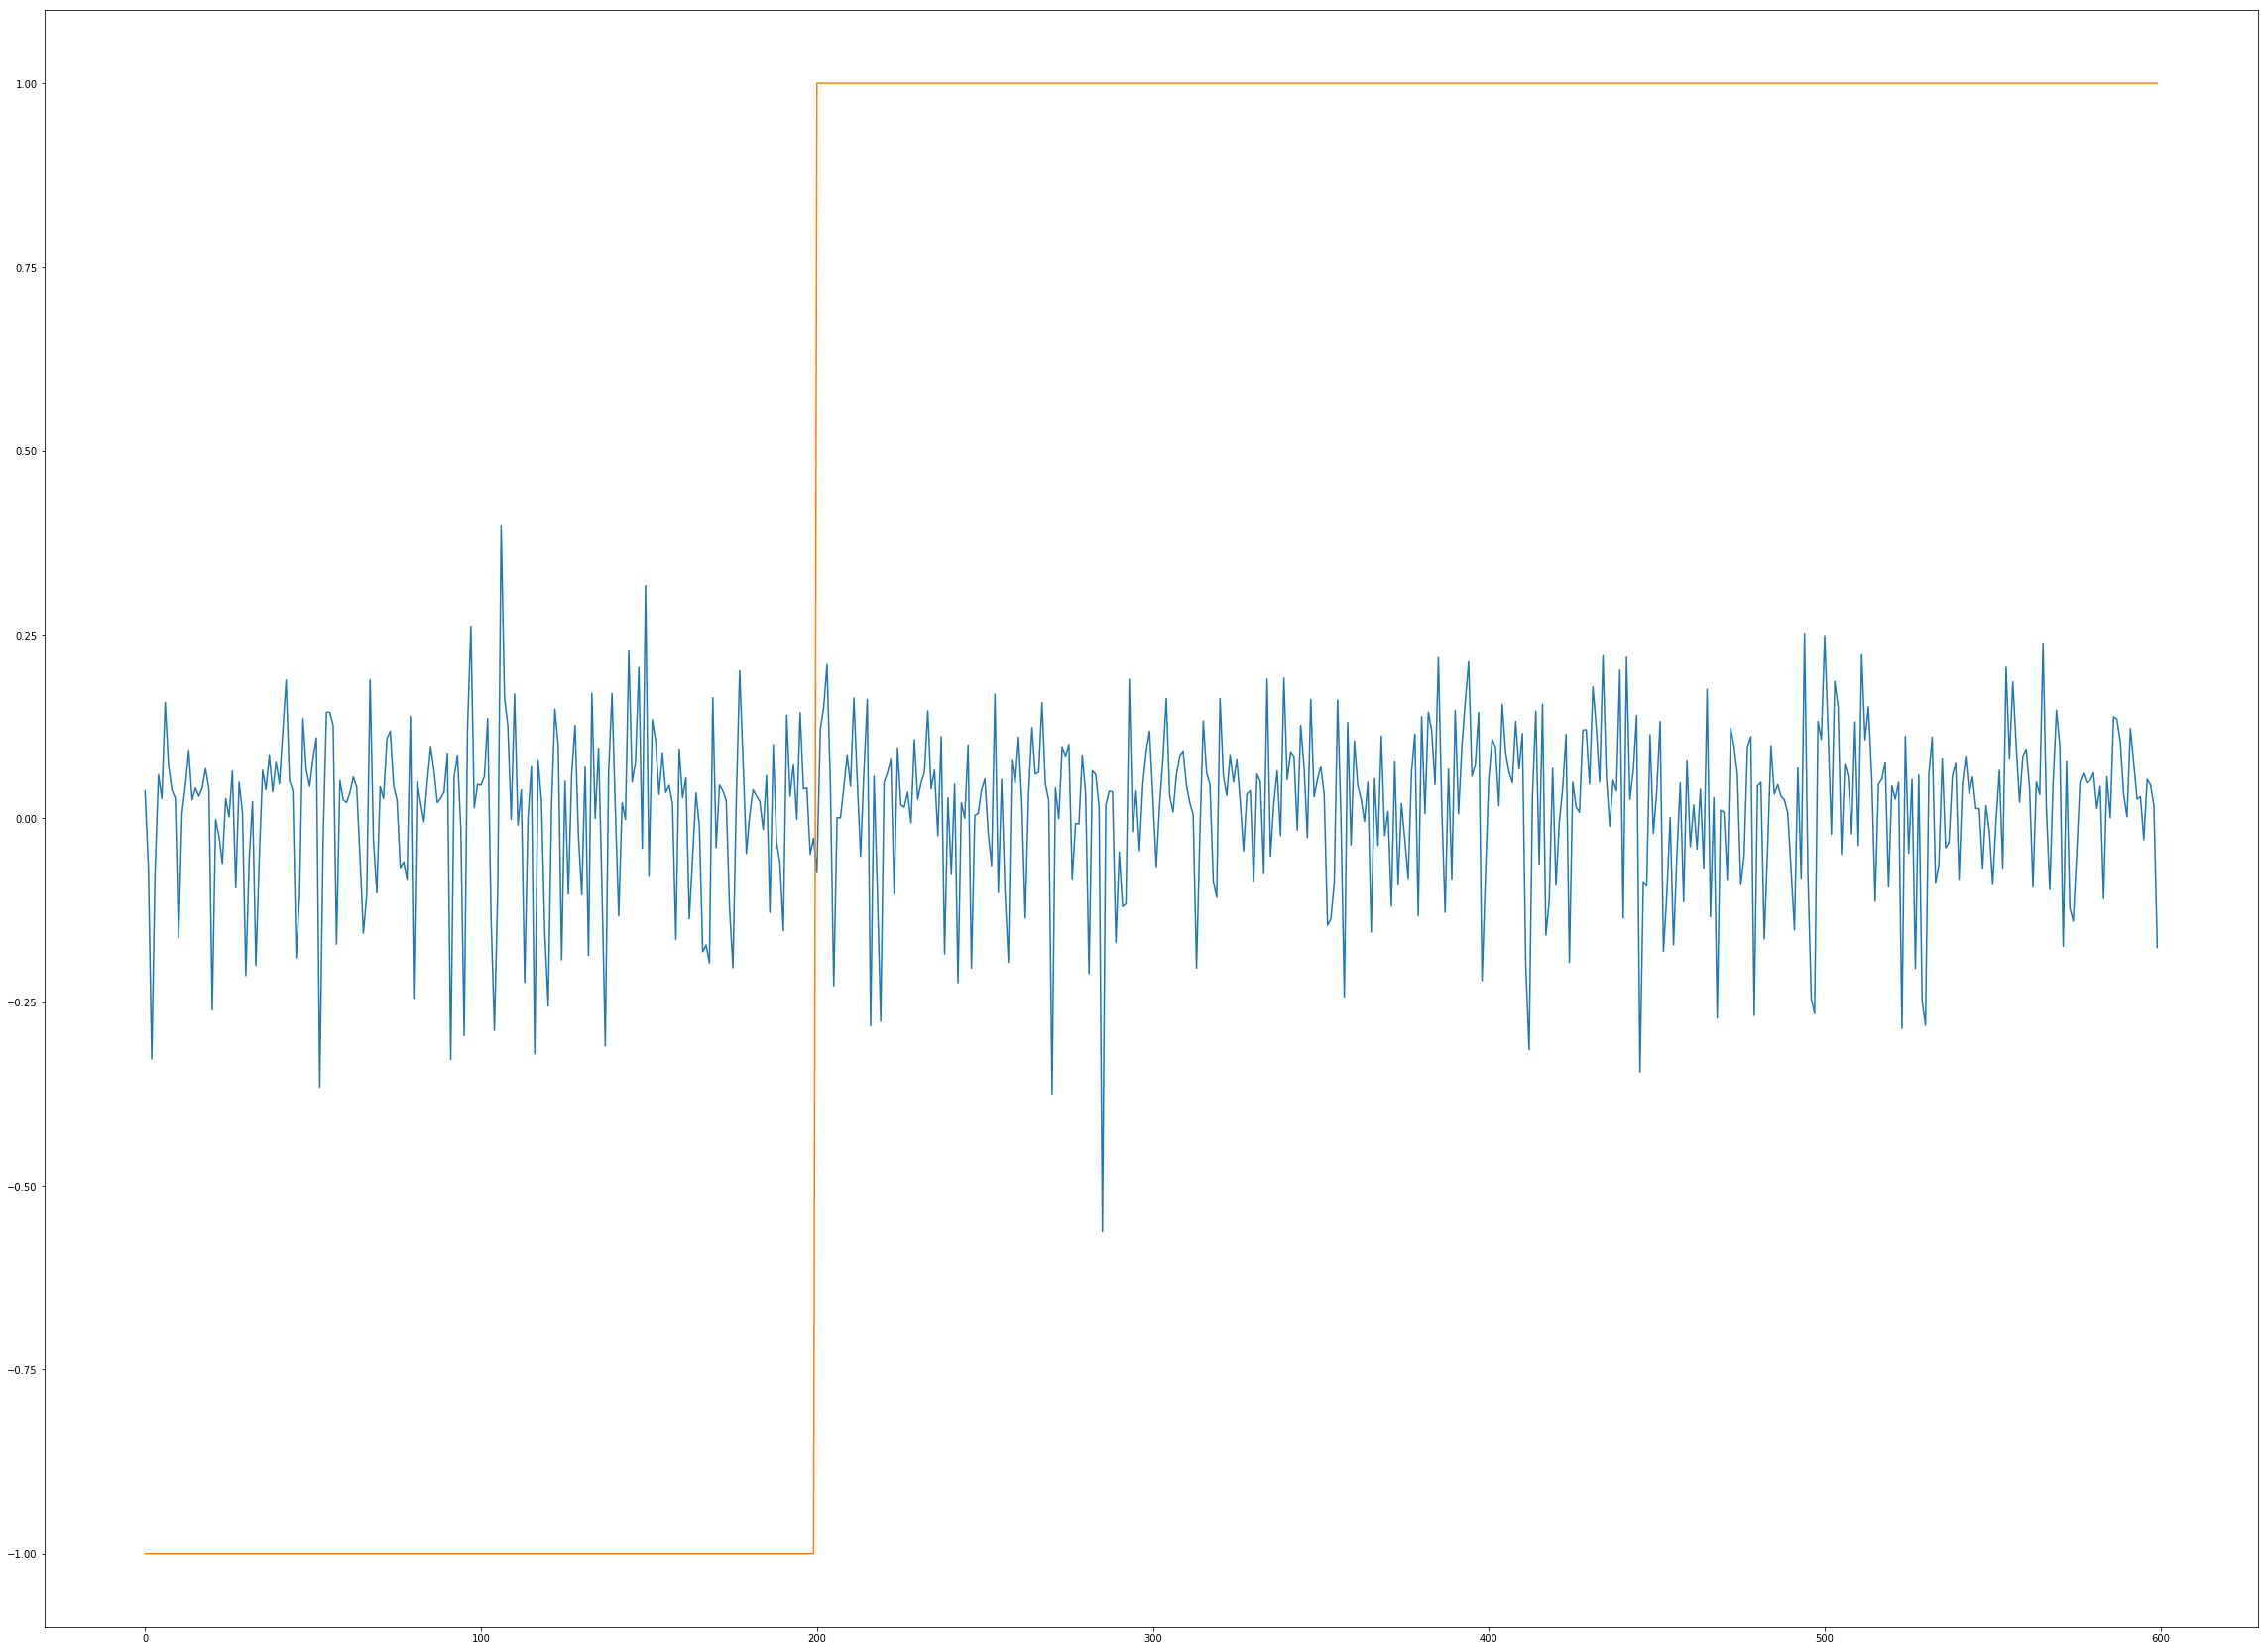

In [52]:
fig = plt.figure(figsize = (40,30))
plt.plot(X_test[:,[3,4,5]] @ p.w_pocket)
plt.plot(np.sort(target_pred));

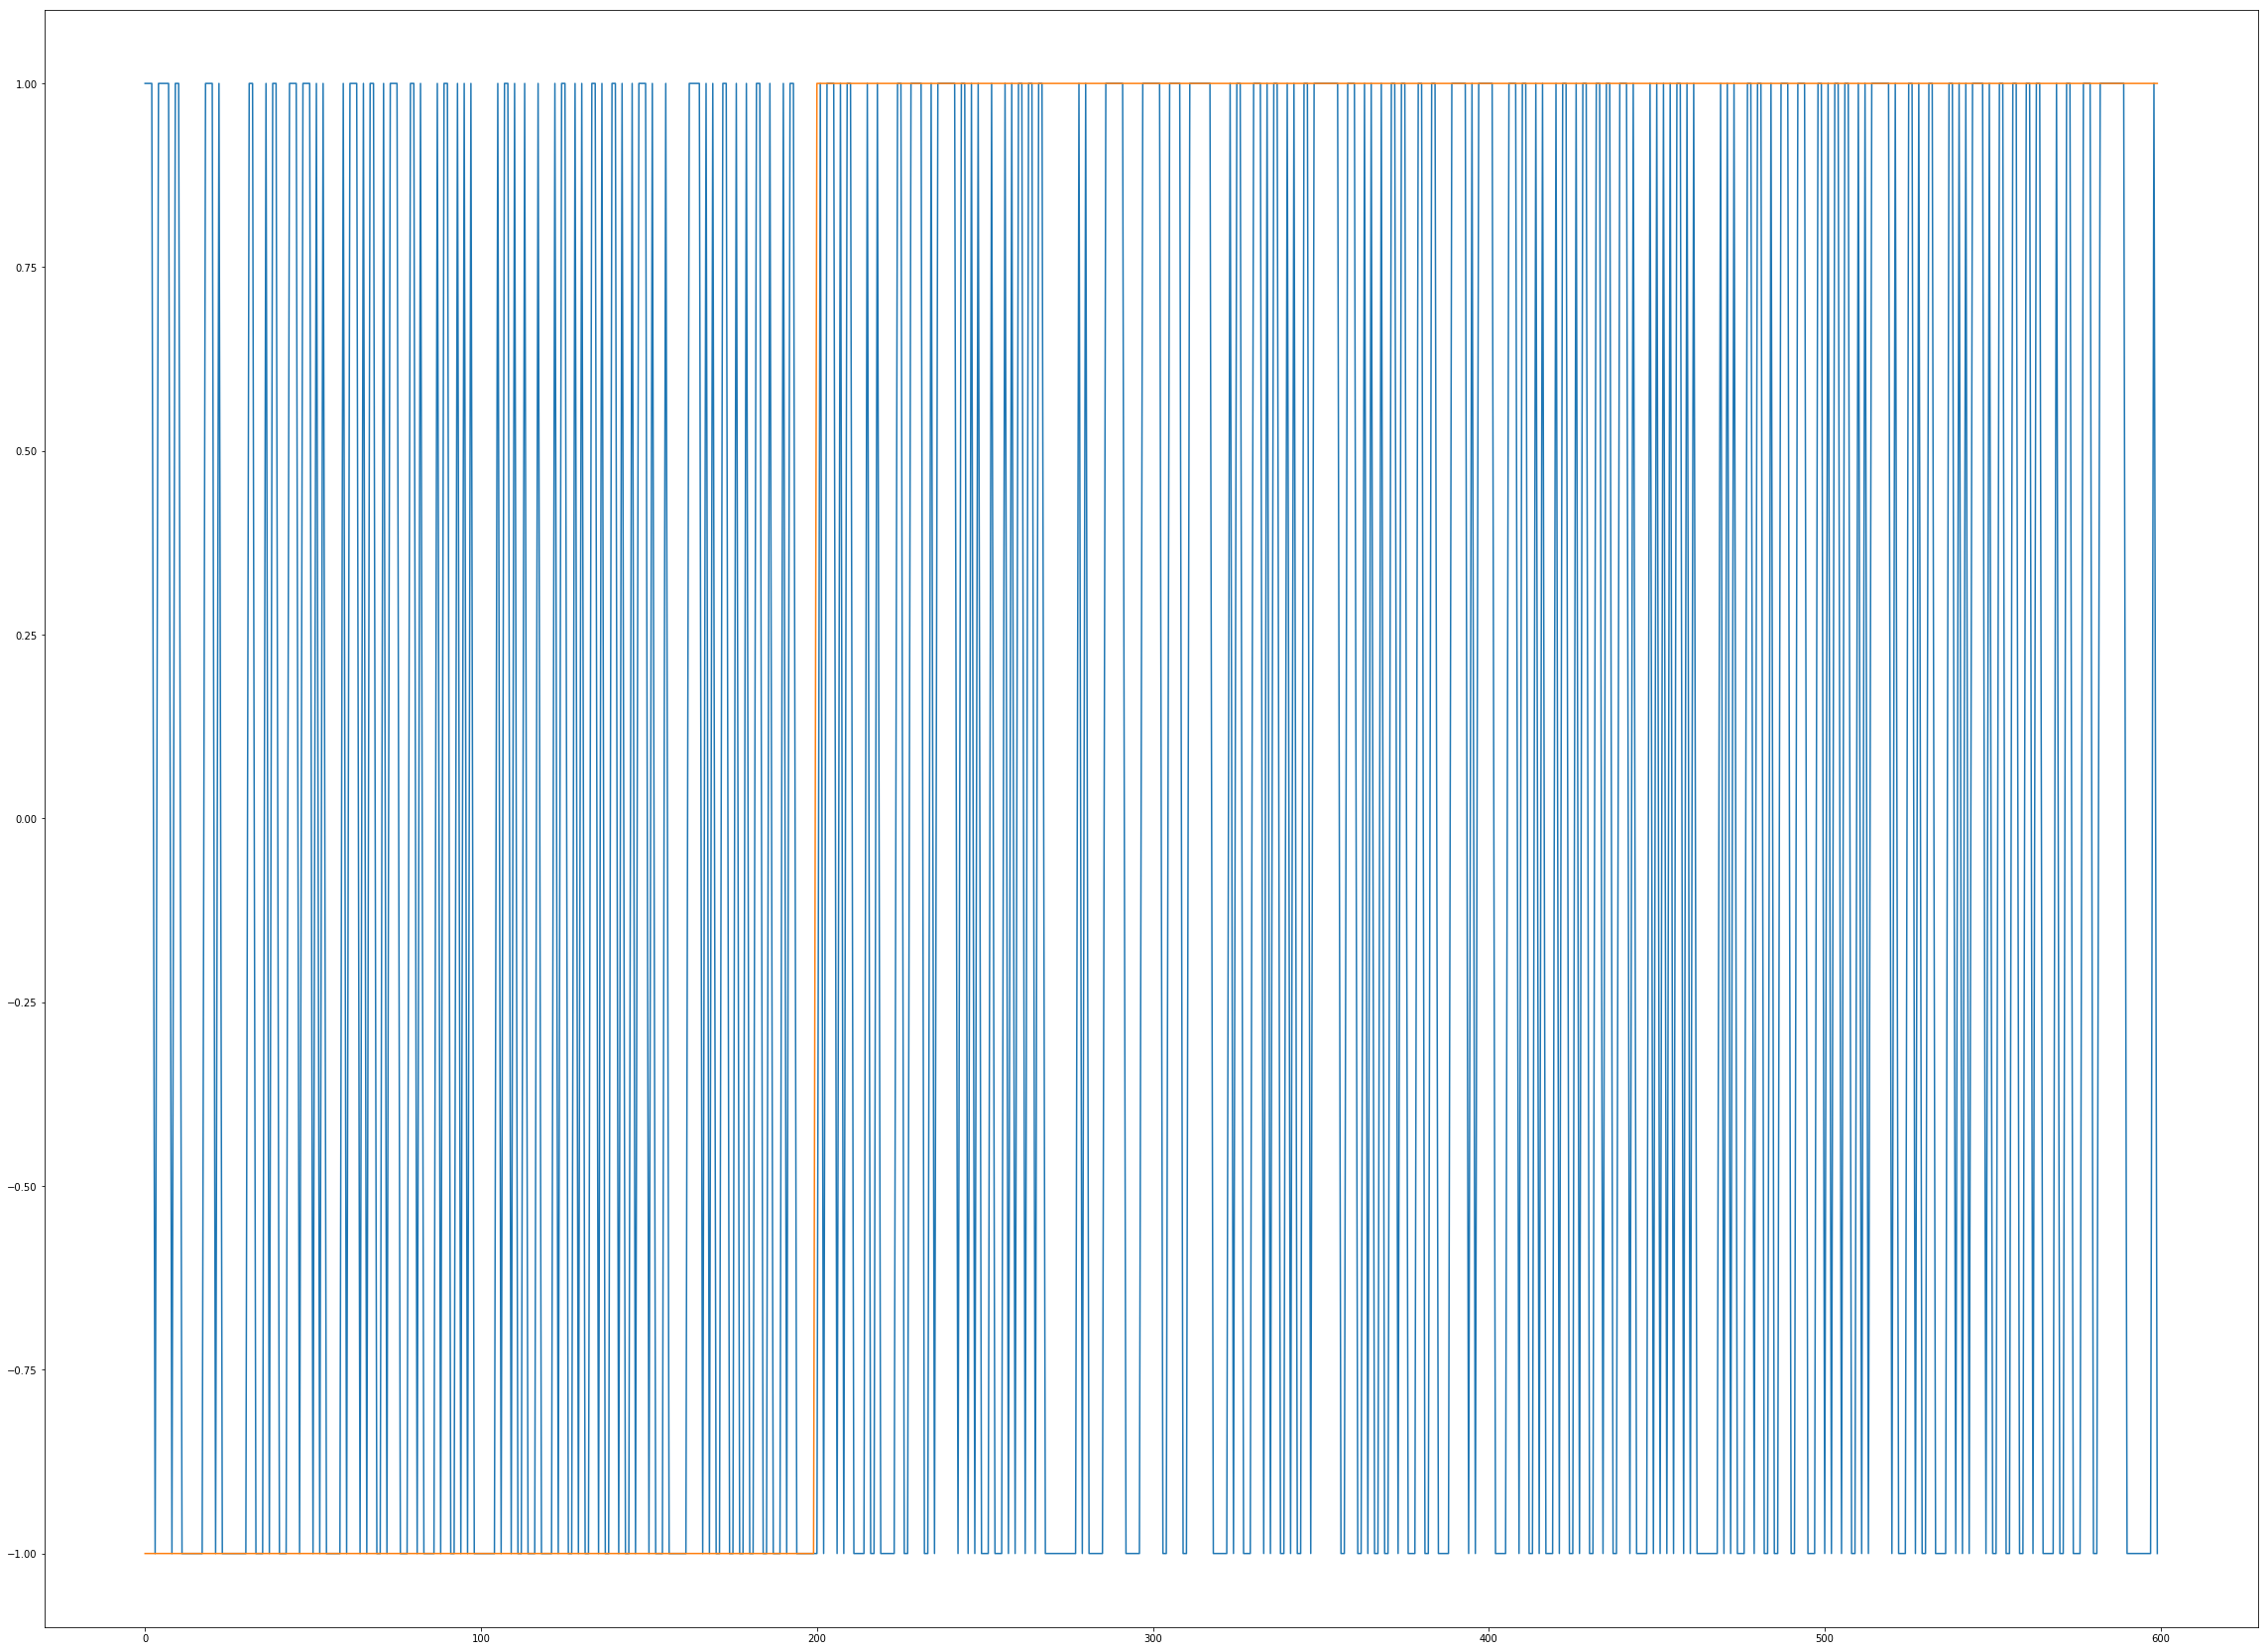

In [53]:
fig = plt.figure(figsize = (40,30))
plt.plot(y_test);
plt.plot(np.sort(target_pred));

In [60]:
target_pred = target_pred.reshape(target_pred.shape[0],1)

In [61]:
# original count
np.unique(y_test, return_counts = True)

(array([-1,  1]), array([313, 287], dtype=int64))

In [62]:
# predicted count
np.unique(target_pred, return_counts = True)

(array([-1,  1]), array([200, 400], dtype=int64))

##### Evaluation Metrics

Confusion Matrix

In [63]:
print(eval.confusion_matrix(y_test, target_pred))

[[125 188]
 [ 75 212]]


Precision

In [64]:
print(eval.precision_score(y_test, target_pred))

0.53


Recall score

In [260]:
print(eval.recall_score(y_test, target_pred))

0.7386759581881533


f1_score

In [65]:
print(eval.f1_score(y_test, target_pred))

0.6171761280931588


ROC score

In [69]:
eval.roc_auc_score(y_test, target_pred)

0.5690184902761853

##### Accuracy

Test data accuracy

In [71]:
#print((TP + TN)/(TP + TN + FP + FN))
np.sum(y_test== target_pred)/target_pred.shape[0]

0.5616666666666666

Train data accuracy

In [74]:
target_pred_train = p.use(X_train[:,[3,4,5]])
target_pred_train = target_pred_train.reshape(target_pred_train.shape[0],1)
np.sum(y_train == target_pred_train)/target_pred_train.shape[0]

0.5457142857142857

Pocket Algorithm gave an accuracy of 56% for test data and 54% for train data.

In [ ]:
d11 = qda.use(Xtest.loc[:,['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY']].values)

#### QDA 

In [226]:
#df = copy(df_dummies)
df = copy(loan_df_model)
train, test = train_test_split(df, train_size = 0.7, test_size=0.3)
Xtrain = train.drop('TARGET',axis=1)
Ytrain = train.loc[:,'TARGET']
test = test.sort_values('TARGET')
Xtest = test.drop('TARGET',axis=1)
Ytest = test.loc[:,'TARGET']
print(train.shape)
print(test.shape)
# Train and Test data
qda = QDA()
qda.train(Xtrain.loc[:,['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY']].values ,Ytrain.values)

(1400, 80)
(600, 80)


In [227]:
d11 = qda.use(Xtest.loc[:,['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY']].values)

In [228]:
out = np.where(d11[0]>= d11[1],-1,1)
target_pred = out
target_pred = target_pred.reshape(target_pred.shape[0],1)
Ytest = Ytest.values.reshape(Ytest.shape[0],1)

#### Evaluation Metrics

In [229]:
#accuracy
np.sum(Ytest == target_pred)/target_pred.shape[0]

0.5416666666666666

Confusion Matrix

In [230]:
print(np.unique(out, return_counts=True))
print(eval.confusion_matrix(out,Ytest))

(array([-1,  1]), array([187, 413], dtype=int64))
[[108  79]
 [196 217]]


In [231]:
#Precision
print(eval.precision_score(y_test, target_pred))

0.4721549636803874


In [234]:
# Recall score
print(eval.recall_score(y_test, target_pred))

0.6794425087108014


In [235]:
#ROC curve

print(eval.roc_auc_score(y_test, target_pred))

0.4914784428538032


In [236]:
#f1_score

print(eval.f1_score(y_test, target_pred))

0.557142857142857


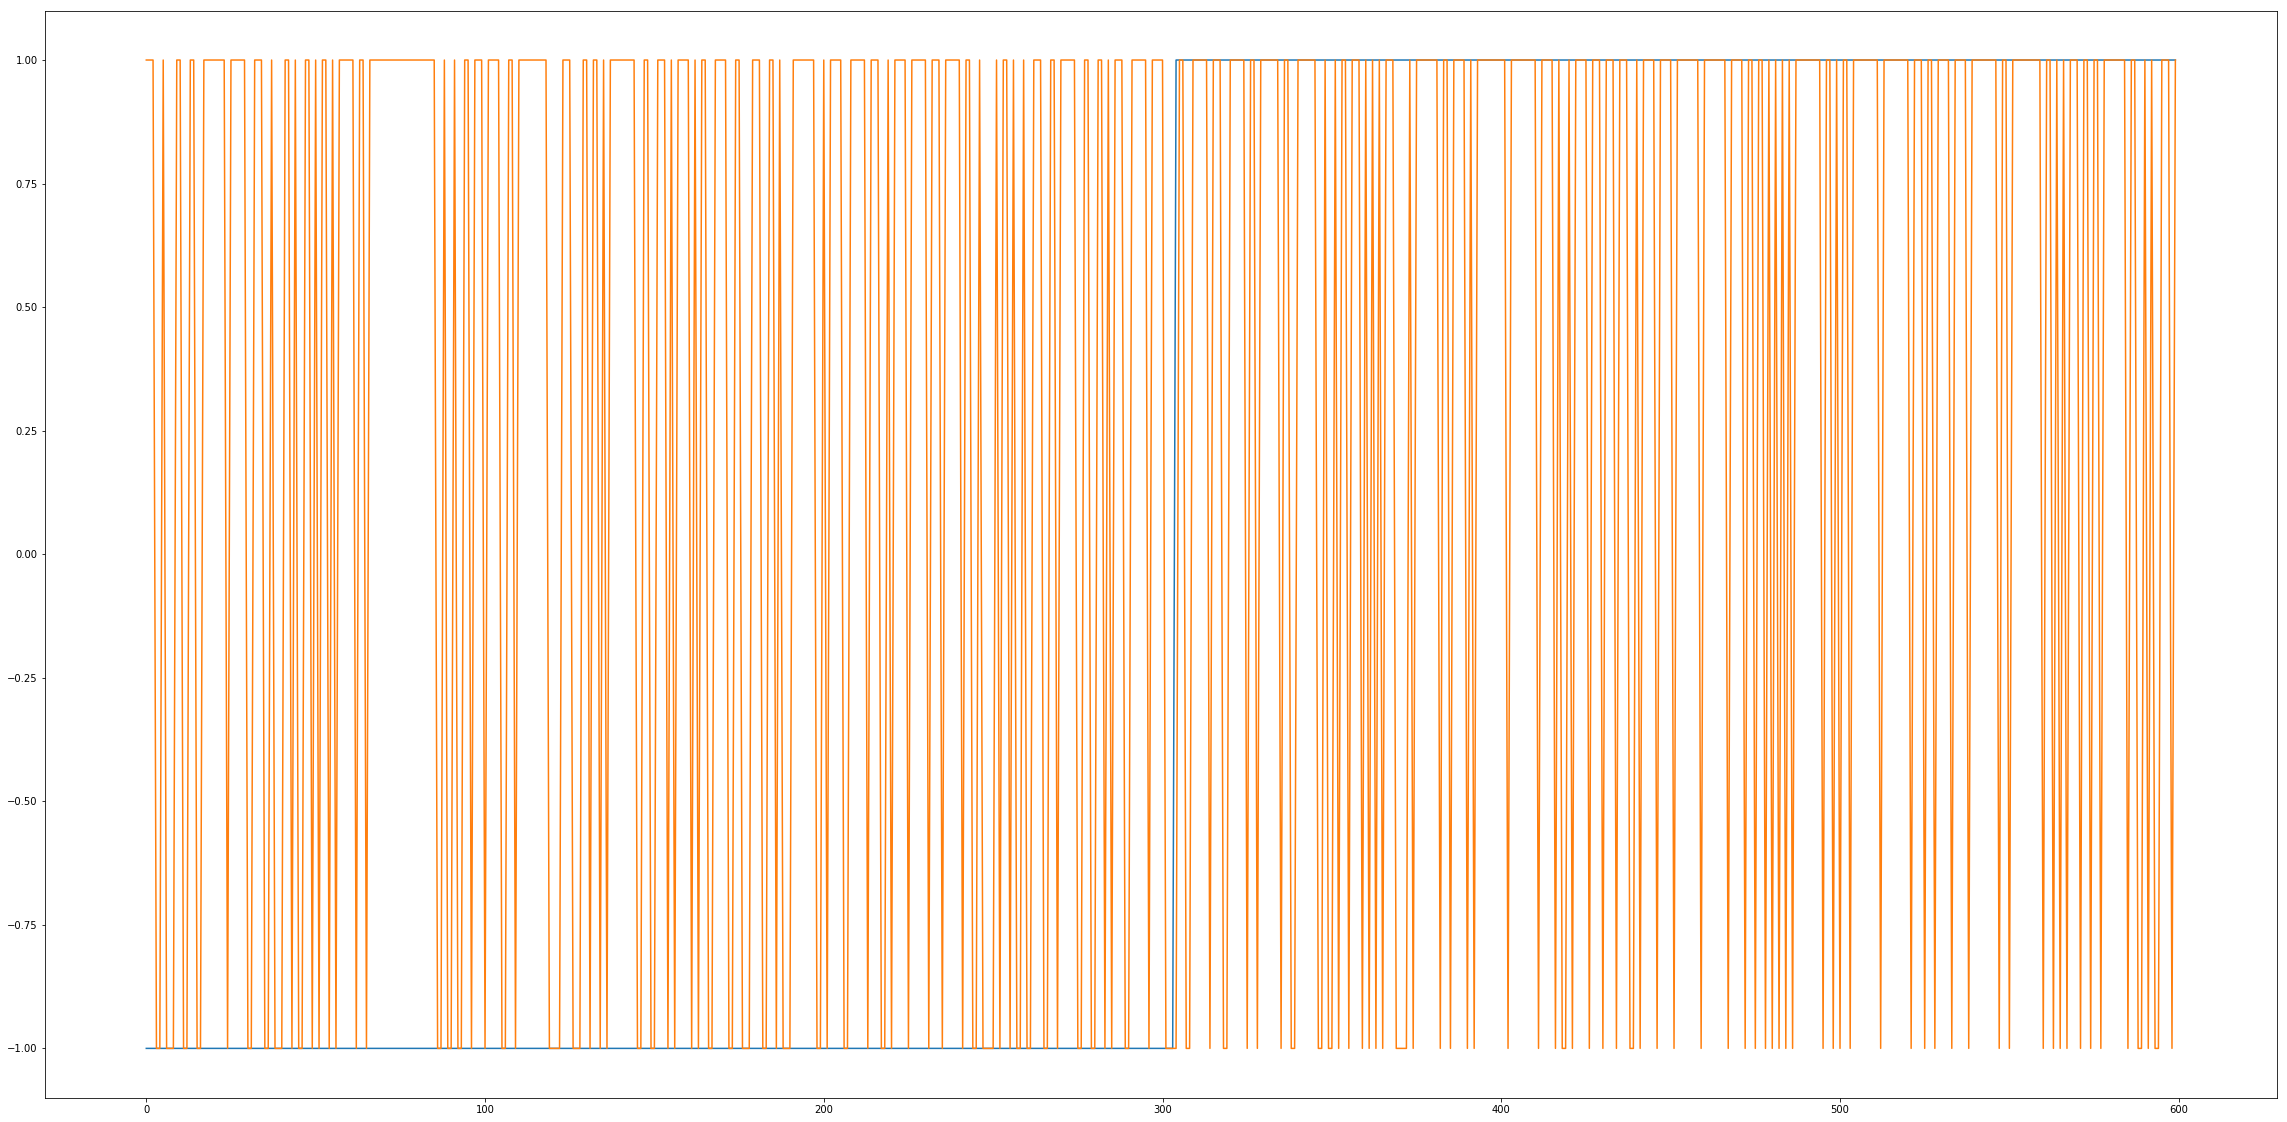

In [237]:
fig = plt.figure(figsize = (40,20))
plt.plot(Ytest)
plt.plot(np.sort(target_pred))

#### LDA

In [238]:
df = copy(loan_df_model)
train, test = train_test_split(df, train_size = 0.7, test_size=0.3)
Xtrain = train.drop('TARGET',axis=1)
Ytrain = train.loc[:,'TARGET']
test = test.sort_values('TARGET')
Xtest = test.drop('TARGET',axis=1)
Ytest = test.loc[:,'TARGET']
print(train.shape)
print(test.shape)
# Train and Test data
lda = LDA()
lda.train(Xtrain.loc[:,['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY']].values ,Ytrain.values)

(1400, 80)
(600, 80)


In [239]:
d11 = lda.use(Xtest.loc[:,['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY']].values)

In [240]:
out = np.where(d11[0]>= d11[1],-1,1)
target_pred = out
target_pred = target_pred.reshape(target_pred.shape[0],1)
Ytest = Ytest.values.reshape(Ytest.shape[0],1)

##### Evaluation Metrics

In [241]:
#accuracy
np.sum(Ytest == target_pred)/target_pred.shape[0]

0.5466666666666666

Confusion matrix

In [242]:
print(np.unique(out, return_counts=True))
print(eval.confusion_matrix(out,Ytest))

(array([-1,  1]), array([286, 314], dtype=int64))
[[151 135]
 [137 177]]


In [243]:
#Precision
print(eval.precision_score(y_test, target_pred))

0.4713375796178344


In [244]:
# Recall score
print(eval.recall_score(y_test, target_pred))

0.5156794425087108


In [245]:
#f1_score
print(eval.f1_score(y_test, target_pred))

0.4925124792013311


In [246]:
#ROC score
eval.roc_auc_score(y_test, target_pred)

0.49266400240451513

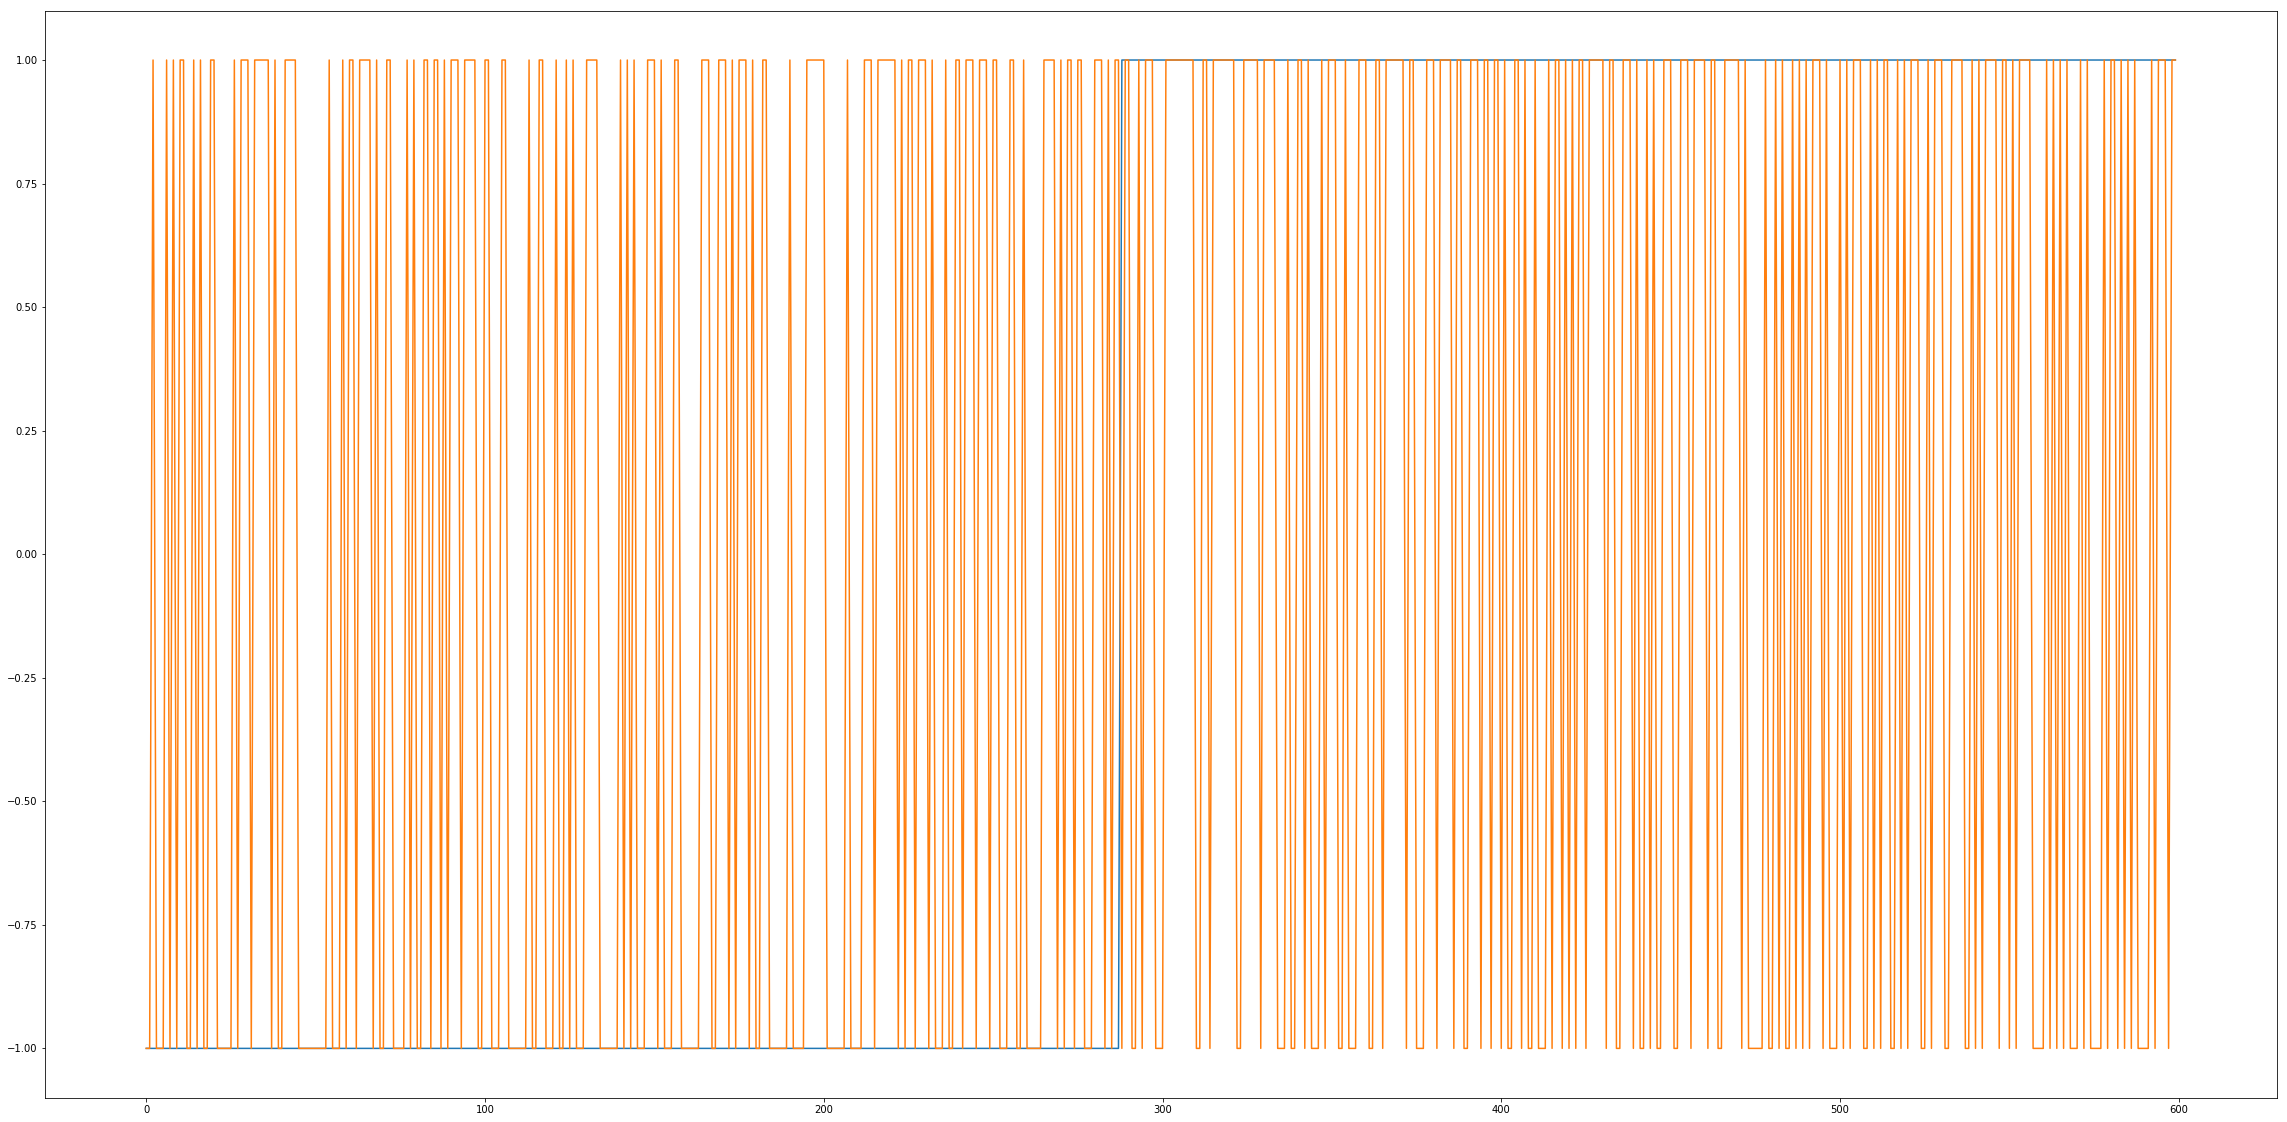

In [247]:
fig = plt.figure(figsize = (40,20))
plt.plot(Ytest)
plt.plot(np.sort(target_pred))

### Logistic Regression

In [248]:
lg = Logistic1(0.001)

In [249]:
lg= Logistic1(0.0000001)
X = Xtrain.loc[:,['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY']].values
T = Ytrain.values
test = test.sort_values('TARGET')
Xtest = test.drop('TARGET',axis=1)
Xtest = Xtest.loc[:,['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY']].values
Ytest = test.loc[:,'TARGET'].values
lg.train(X,T)
targetPred = lg.use(Xtest)
# retrieve labels and plot
targetPred1 = np.argmax(targetPred, 1)
#targetPred1 = targetPred1.reshape(targetPred1.shape[0],1)
targetPred1 = targetPred1.reshape(targetPred1.shape[0],1)

targetPred1[targetPred1==0] = -1
Ytest = Ytest.reshape(Ytest.size,1)
print(np.unique(Ytest, return_counts=True))
print(np.unique(targetPred1, return_counts=True))

(array([-1,  1]), array([288, 312], dtype=int64))
(array([-1,  1], dtype=int64), array([383, 217], dtype=int64))


In [250]:
targetPred1.shape, Ytest.shape

((600, 1), (600, 1))

Accuracy

In [259]:
np.sum(Ytest== targetPred1)/targetPred1.shape[0]

0.465

##### Evaluation metrics

Confusion matrix

In [251]:
eval.confusion_matrix(Ytest,targetPred1)

array([[175, 113],
       [208, 104]], dtype=int64)

In [252]:
#Precision
print(eval.precision_score(Ytest,targetPred1))

0.4792626728110599


In [253]:
# Recall score
print(eval.recall_score(Ytest,targetPred1))

0.3333333333333333


In [254]:
#f1_score
print(eval.f1_score(Ytest,targetPred1))

0.3931947069943289


In [255]:
#ROC curve
eval.roc_auc_score(Ytest,targetPred1)

0.47048611111111105

In [256]:
Ytest.shape

(600, 1)

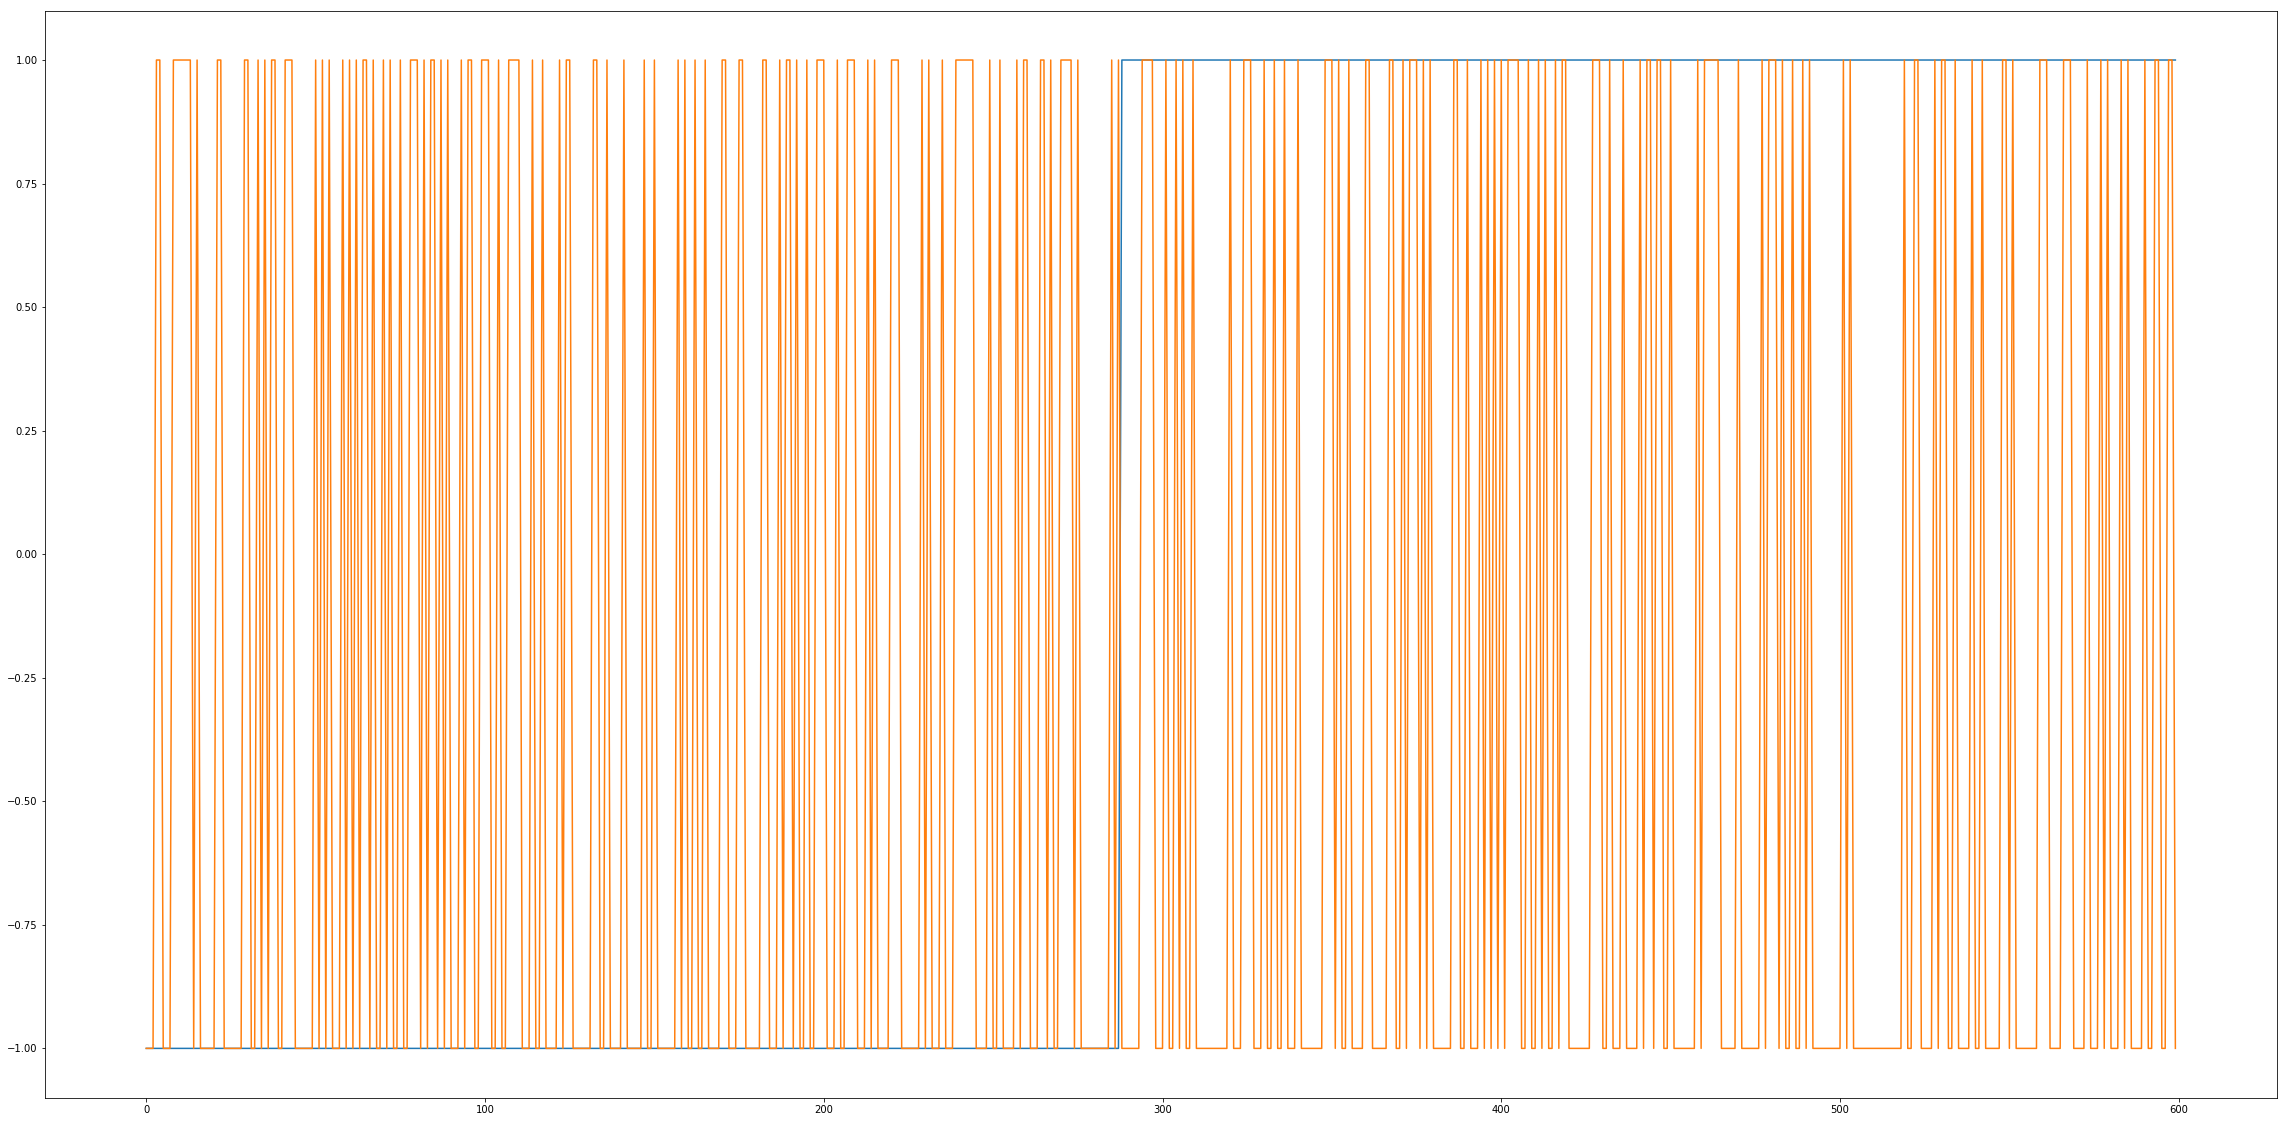

In [257]:
fig = plt.figure(figsize = (40,20))
plt.plot(np.sort(Ytest))
plt.plot(np.sort(targetPred1))

#### Model Comparision:

Accuracy of pocket algorithm:56.16%   
Accuracy of QDA:54.16%   
Accuracy of LDA: 54.66%   
Accuracy of Logistic regression: 46.5% 

By comparing test data accuracies, pocket algorithm is the best among above 4.  
When comparing running time of these models, pocket algorithm is the worst. If number of iterations are increased to a large number it becomes even worse but we can get a better solution.

There are a lot of factors that needs to be considered in evaluating a model such as precision, recall, f1, roc score.  
All these metrics are calculated for above 4 models and helps in evaluating a model performance for a given data.

# Conclusions

Summarize your work here. 
Which classifier do you think the best? 
Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

I implemented classification algorithms such as Pocket, QDA, LDA, Logistic Regression for labeling the data. Learned about confusion matrix to measure the performance of models. Got knowledge on performance evaluation using Accuracy, precision, recall, f1, AUC curves.

# References

https://seaborn.pydata.org/
https://campus.datacamp.com/courses/introduction-to-data-visualization-with-python   
https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn    
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html     
https://github.com/codebasics/py/blob/master/ML/5_one_hot_encoding/one_hot_encoding.ipynb    
http://localhost:8888/notebooks/Reading/Solutions_Professor/Note-Classification.Sol.ipynb